# Bounded Height Matrices of Integers (Bohemian Matrices)


$$
\begin{bmatrix}
-1 & \phantom{-}0 & \phantom{-}1 & \phantom{-}1 \\
\phantom{-}1  & \phantom{-}1 & -1 & \phantom{-}0 \\
\phantom{-}0 & \phantom{-}0 & \phantom{-}1 & -1 \\
-1 & -1 & -1 & \phantom{-}1 
\end{bmatrix}
$$

Matrices have a central place in modern computation, and are often introduced in high school. This unit does not presuppose knowledge of matrices, however, or try to teach the standard curriculum. Instead, we travel quickly to a new place in the linear algebra lanscape (we might as well call it Bohemia, for **BO**unded **HE**ight **M**atrices of **I**ntegers (BOHEMI))  and turn you loose to explore on your own. As we write this unit, there is not a lot known about this area, and you may very well discover something new, for yourself. We're not kidding.

But many people are now interested, and the field is changing pretty rapidly.  Instead of worrying about that, or about missing opportunities, we will concentrate on the fun parts.

As motivation, we point at the pictures you can find at __[bohemianmatrices.com/gallery](http://www.bohemianmatrices.com/gallery/)__.  We will explain here how to create your own.

The introduction to matrices in section [2](#a-lightning-introduction-to-matrices) is short, and even if you know matrices _well_, we suggest you read it, for notation as well as a refresher on some more obscure notions! Besides, there's some open questions in there already.

__A Note to the Student/Reader__ If you have not yet had an introduction to matrices, our "Lightning Introduction" below will get you _started_ enough to get something out of this section (really) and may also be enough to allow you to make an original contribution (really! Chiefly because you won't be encumbered with the standard points of view). But it will not replace a Linear Algebra course.  We recommend that you just plunge in, and try and make sense of this right away (you might have to read the introduction to complex numbers in the appendix, but that's fairly short).  We also recommend that later, after you have had a linear algebra course, you come back and read/do the activities again, because you might (probably will) get more out of it the second time.  We _expect_ that doing things in this order will enrich your linear algebra course.  In particular, we think a lot of linear algebra courses don't pay enough attention to _eigenvalues_ (defined below, don't you worry!); this should fix that problem.  Also, the beginning student doesn't see enough of the different possible matrix structures (symmetric, skew-symmetric, tridiagonal, and so on, again defined below) and so the experience here of _making your own_ structures will help with that as well.

__A Note to the Instructor__ The "Lightning Introduction to Matrices" below starts with motivating the determinant, and also matrix-vector notation and multiplication conventions, which are often glossed over in a first treatment.  Although they are very simple notions (to people who find linear algebra simple, and to people who have had a lot of practice with it) these first notions sometimes cause trouble, and that's one reason we include them here explicitly.  Our "Lightning Introduction" does _not_ cover much standard material from linear algebra, though, and that is intentional: we don't want to replace the linear algebra courses so much as enrich them and strengthen them.  We don't even mention Laplace expansion or Cramer's Rule or Gaussian Elimination or LU factoring or, well, much of anything that is in any standard course.  That standard material _might_ be helpful for the student/learner here (we think it's useful to know, for instance, that symmetric matrices with real entries have only real eigenvalues; or that complex symmetric matrices are not Hermitian matrices) but the volume of "Linear Algebra Facts" is so overwhelmingly large that the student might spend all their time trying to memorize them (for instance, the distinction between "defective" matrices versus "derogatory" matrices&mdash;a distinction that we ourselves have to look up all the time).  We don't want to throw the student into the deep end of what is already _known_.  Instead we want to throw them into the (deeper!) end of what is _unknown_!  We have found that beginning students have exceptional creativity, and we want to use that.  So we introduce matrices in a "minimal" kind of way, in the hopes that the students will find new paths for themselves.

One other aspect is that we don't get into the issue of the numerical stability (rather, lack thereof) of naive methods to compute the determinant.  To improve stability, most numerical analysts would compute a determinant by first factoring the matrix (which also typically gives direct access to anything you would need the determinant for). Most _computer algebraists_ would believe that they were working in a "sparse" case and look for a Laplace expansion (or other niche method) and do the arithmetic exactly.  Both of these aspects, together with a discussion of the greater-than-exponential cost of the Laplace expansion for a dense $n$ by $n$ matrix, belong in higher courses and not in this one.

One important aspect of genuine learning, though, is to make connections to what people already know; so if the student _does_ know some linear algebra facts, they will for sure feel more comfortable in this section.  We just think that the student can do very well even if they _don't_ feel comfortable (just yet).

## A note on programming style for this notebook

We will introduce various Python imports as we go along.  Some of the code that we will show is very definitely intended to be read and understood, rather than blindly run.  We intend our code more to be a guide for what to do, and it's written for ease of understanding, not for efficiency.  If you want to take this code and make it faster and better, please go ahead!  Alternatively, writing your own from scratch might be both easier and more fun.  We leave it up to you.

Here are the packages we are going to need (we import them now because why not):

In [1]:
import itertools
import random
import numpy as np
from numpy.polynomial import Polynomial as Poly
import matplotlib as plt
import time
import csv
import math
from PIL import Image
import json
import ast
import sys
sys.path.insert(0,'../../code/Bohemian Matrices')
from bohemian import *
from densityPlot import *

The programs get gradually more intricate as the notebook goes along, but none of the codes are _very_ long.  We'll try to explain what we are doing, as we go.

The Maple packages that we use in our Maple code (in the parallel Maple documents) are (perhaps not surprisingly) very similar:
1. Iterator
2. RandomTools
3. evalhf (for hardware-float evaluation: fast and finicky)
4. plots
5. Our own code BohemianUtilities.mpl, which is usually attached to Maple workbooks
6. CodeTools:-Usage
7. read/write (built-in to basic Maple)
8. math functions are built-in to basic Maple
9. ImageTools






Before we begin the math of linear algebra, though, let's look at some computer tools that will be useful.  First, we will need a way to write down _all possible_ vectors of length 3 (or whatever), whose entries are from a given (finite) population.  We now show how to use the _itertools_ package to do this.  We will need this ability in what follows.  We will also need to be able to sample randomly from such collections, but it will turn out to be easier to manage such sampling with our own code, which you can use for your own explorations.

The first Python package we imported above was `itertools`.  These are tools for iterating over various combinatorial structures.  We are only going to need the simplest structure, called a [Cartesian Product](https://en.wikipedia.org/wiki/Cartesian_product).  Look over the following code, which is intended to generate all possible sequences of length `sequencelength` where each entry of the sequence can be any member of the given `population` (repeats are allowed).  Below, we show two methods of iterating through the possibilities.

In [2]:
population = [1.0, 1j] # Choose a finite set of complex numbers (usually integers or Gaussian integers)
sequencelength = 3 # We will work with sequences of length "sequencelength"
numberpossible = len(population)**sequencelength  # Each entry of the sequence is one of the population
# Generate (one at a time) all possible choices for
# vector elements: this is what itertools.product does for us.
possibilities = itertools.product( population, repeat=sequencelength )
possible = iter(possibilities)
# Enumerate all lists of possible population choices:
# Gets the next one when needed.
for n in range( numberpossible ):
    s = next(possible)
    print(n, [s[k] for k in range(sequencelength)] )

# Another way: (creates an actual big list)
possibilities = list(itertools.product(population, repeat=sequencelength))

for p in possibilities:
    print( [p[k] for k in range(sequencelength)])

0 [1.0, 1.0, 1.0]
1 [1.0, 1.0, 1j]
2 [1.0, 1j, 1.0]
3 [1.0, 1j, 1j]
4 [1j, 1.0, 1.0]
5 [1j, 1.0, 1j]
6 [1j, 1j, 1.0]
7 [1j, 1j, 1j]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1j]
[1.0, 1j, 1.0]
[1.0, 1j, 1j]
[1j, 1.0, 1.0]
[1j, 1.0, 1j]
[1j, 1j, 1.0]
[1j, 1j, 1j]


By changing the variable `sequencelength` above, we can generate all possible vectors of whatever length we want; this is the "Cartesian Product" of sequencelength copies of the population.  The number of such vectors grows exponentially with `sequencelength` (and later we will see that `sequencelength` itself can grow like the square of the dimension of the matrix&mdash;this is very, very fast growth indeed, and leaves simple exponential growth (and even factorial growth!) in the _dust_).

### Choosing at "random" instead of exhausting all possiblities

Sometimes we will want only to sample the population (because the total number of possibilities is too big).  To do that, we at first thought to start with an integer "chosen at random" from $0$ to the largest possible number (`numberpossible` above, minus 1 of course because Python).  Then we needed to convert that integer into its base-$b$ representation, where $b$ is the size of the population.  Then each base-$b$ digit would give us a unique member of the population.

We did this for a while, before realizing that it was silly.  The conversion to a base-$b$ representation gave us a vector of random numbers; the vector was of length `sequencelength` and the random numbers were in `range(len(population))`.  Why not simply create that vector in the first place?  So that is what we now do.

(sec:a-lightning-introduction-to-matrices)=
## Back to the math: A lightning introduction to matrices
Suppose each of the numbers $t_1$ and $t_{2}$ might be $-1$, $0$, or $1$. Perhaps $(t_1,t_2)$ is $(-1, 1)$ or $(1, 0)$, or any of the nine possible choices in the Cartesian product. Then suppose also that we have the following two equations in two unknowns $x$ and $y$ to solve:

\begin{align*}
    t_{1}x + t_{2}y &= 1 \\
    -x + t_{1}y &= -1
\end{align*}

Notice that $t_{1}$ occurs in both equations. This is a rather special system. To solve these, it seems very easy to multiply the second equation by $t_{1}$ to get
\begin{equation*}
    -t_{1}x + t_{1}^{2}y = -t_{1} \>.
\end{equation*}
We can add this equation to the first, which cancels the $x$ term, to get
\begin{equation*}
    0\cdot x + (t_{2} + t_{1}^{2})y = 1 - t_{1} \>.
\end{equation*}
Provided $t_{2} + t_{1}^{2}$ is not equal to zero, we can find $y$:
\begin{equation*}
    y = \dfrac{1 - t_{1}}{t_{2} + t_{1}^{2}} \quad \text{if}\ t_{2} + t_{1}^{2} \neq 0 \>.
\end{equation*}
If $t_{2} + t_{1}^{2} = 0$ and we're "unlucky" in that $1 - t_{1} \neq 0$ then $0\cdot y$ is nonzero, which is impossible. If we're "lucky" and $t_{1} = 1,$ then $y$ can be anything and still $0\cdot y = 0$. Once we have $y$, the second equation gives $x$ handily.

But to avoid relying on luck we'd like $t_{2} + t_{1}^{2} \neq 0$. __We say that the system is "singular" if this quantity is zero.__  Logically, we say that it is _nonsingular_ if this quantity is _not_ zero.  "Nonsingular" means that we don't have to rely on luck.

Increase the dimension of our system to the following, analogous, set of three equations in three unknowns $x$, $y$, and $z$:

\begin{alignat*}{8}
    t_{1}x & &+ t_{2}y & &+ t_{3}z & & &= 1\\
    -x & &+ t_{1}y & &+ t_{2}z & & &= 0 \\
    & & -y & &+ t_{1}z & & &=-1 \>.
\end{alignat*}

Notice that there's only one more number, $t_{3} \in \{-1, 0, 1\}$. Again this is a special system.

To solve it, multiply the second equation by $t_{1}$ and add it to the first to get 
\begin{equation*}
    0\cdot x + (t_{2} + t_{1}^{2})y + (t_{3} + t_{2}t_{1})z = 1 \>.
\end{equation*}
Now multiply the third equation by $t_{2} + t_{1}^{2}$ and add it to this one:
\begin{equation*}
    (t_{3} + 2t_{2}t_{1} + t_{1}^{3})z = 1 - (t_{2} + t_{1}^{2}) \>. 
\end{equation*}
Again, what determines if we can solve for $z$ or not is whether or not
\begin{equation*}
    t_{3} + 2t_{2}t_{1} + t_{1}^{3} = 0 \>.
\end{equation*}
We'll join common usage and call this the "determinant" of our equations. __If the determinant is zero, we say that the system is singular.__ (Curiously enough, the theory of determinants preceded the theory of matrices, in its history. That's why we're doing it this way now. It's easier.)

[Here is a nice video from 3blue1brown with a geometric interpretation of determinants in general](https://youtu.be/Ip3X9LOh2dk)

The following four-dimensional system is likewise analogous:
\begin{alignat*}{10}
    t_{1}x & &+ t_{2}y & &+ t_{3}z & &+ t_{4}w & & &= 1 \\
    -x & &+ t_{1}y & &+ t_{2}z & &+ t_{3}w & & &=0 \\
    & &-y & &+ t_{1}z & &+ t_{2}w & & &=0 \\
    & & & &-z & &+ t_{1}w & & &= -1 \>.
\end{alignat*}

It begins to be tiring to write and read $x$, $y$, $z$, $w$ over and over. We make use of the following _convention_
\begin{equation*}
    \begin{bmatrix}
        t_{1} & t_{2} & t_{3} & t_{4}
    \end{bmatrix}
    \begin{bmatrix}
        x \\
        y \\
        z \\
        w
    \end{bmatrix}
    = t_{1}x + t_{2}y + t_{3}z + t_{4}w \>.
\end{equation*}

This hardly seems useful, until we add the further convention that we can do several equation at once, like so:
\begin{equation*}
    \begin{bmatrix}
        t_{1} & t_{2} & t_{3} & t_{4} \\
        -1 & t_{1} & t_{2} & t_{3} \\
        & -1 & t_{1} & t_{2} \\
        & & -1 & t_{1}
    \end{bmatrix}
    \begin{bmatrix}
        x \\
        y \\
        z \\
        w \\
    \end{bmatrix}=
    \begin{bmatrix}
        1 \\
        0 \\
        0 \\
        -1
    \end{bmatrix}
    \>.
\end{equation*}

This array on the left is of course a _matrix_, where we have further used the convention of leaving blank the entries where zeros are (which requires a neat hand when writing on paper or a board).  This gives us an _algebra_ of matrices, when we extend this product notion columnwise: writing the matrix $\mathbf{B}$ as a collection of columns $[\mathbf{b}_1, \mathbf{b}_2, \ldots, \mathbf{b}_m]$ we then define the product of two matrices $\mathbf{A}$ and $\mathbf{B}$ as $\mathbf{A}\mathbf{B} = [\mathbf{A}\mathbf{b}_1, \mathbf{A}\mathbf{b}_2, \ldots, \mathbf{A}\mathbf{b}_m]$; that is, each column of the product is the column that you get by multiplying $\mathbf{A}$ times that column of $\mathbf{B}$.  By trying a few examples, you can convince yourself that usually this multiplication is _not_ commutative: most of the time, $\mathbf{A}\mathbf{B}$ is not the same as $\mathbf{B}\mathbf{A}$.  Sometimes it is, though, and when it is, something special happens, which we will talk about later.

The diagonal of the matrix with all the $t_{1}$'s is called the _main_ diagonal; the one with all the $-1$'s is called the $1^{\text{st}}$ _subdiagonal_. Because this matrix is constant on each of its diagonals, it's called a "Toeplitz" matrix (after [Otto Toeplitz](https://en.wikipedia.org/wiki/Otto_Toeplitz)). Because all entries are zero below the $1^{\text{st}}$ subdiagonal, it's called an upper Hessenberg matrix (after [Karl Hessenberg](https://en.wikipedia.org/wiki/Karl_Hessenberg)). This matrix is indeed _both_ Toeplitz and upper Hessenberg. Because each $t_{i}$ (and the subdiagonal entries) is either $-1$, $0$, or $1$, the matrix is also Bohemian. We say this is a Bohemain upper Hessenberg Toeplitz matrix.

In matrix form, the $1\times 1$ equation $t_{1}x = 1$ is pretty boring, but this gives us the following sequence of matrices:
\begin{alignat*}{3}
    &\begin{bmatrix}
        t_{1}
    \end{bmatrix}
    &&\quad \text{with determinant $t_{1}$} \\
    &\begin{bmatrix}
        t_{1} & t_{2} \\
        -1 & t_{1}
    \end{bmatrix}
    &&\quad \text{with determinant $t_{2}+ t_{1}^{2}$} \\
    &\begin{bmatrix}
        t_{1} & t_{2} & t_{3} \\
        -1 & t_{1} & t_{2} \\
        & -1 & t_{1}
    \end{bmatrix}
    & &\quad \text{with determinant $t_{3} + 2t_{2}t_{1} + t_{1}^{3}$}
\end{alignat*}
and now
\begin{equation*}
    \begin{bmatrix}
        t_{1} & t_{2} & t_{3} & t_{4} \\
        -1 & t_{1} & t_{2} & t_{3} \\
        & -1 & t_{1} & t_{2} \\
        & & -1 & t_{1}
    \end{bmatrix}\>.
\end{equation*}
We claim this four by four system has determinant
\begin{equation*}
    t_{4} + 3t_{2}t_{1}^{2} + 2t_{3}t_{1} + t_{2}^{2} + t_{1}^{4} \>.
\end{equation*}
By the method we've demonstrated (or, if you already know how to take determinants) you should be able to verify that.

(BohemianActivity-1)=

```{admonition} Bohemian Activity 1
:class: tip
_Guess the pattern of these determinants_, $t_1$, $t_2+t_1^2$, $t_3+2t_2t_1 + t_1^3$, $t_4+3t_2t_1^2+2t_3t_1+t_2^2+t_1^4$, and so on, and give a way to compute the $5\times 5$ and $6 \times 6$ version. (Hint: Yes, it's in Wikipedia, but unless you know under which name, this hint doesn't actually help.)
{ref}`[Our thoughts] <BohemianActivityReport-1>`
```

(BohemianActivity-2)=

```{admonition} Bohemian Activity 2
:class: tip
How many matrices of this kind are there at each dimension (This is easy.) _How many matrices of this kind have zero determinant?_ For instance, the $1 \times 1$ matrices number 3 in all, as $t_{1} = -1$, $0$, or $1$ in turn; only one of these matrices, $[0]$, has zero determinant. (The one by one case is, well, done; the two by two case takes a few more computations but is within reach of hand computation; the three by three would count as punishment to have to do it by hand.  The general case seems very hard, and while we know the answer for the first few dimensions, we don't know the answer in general. This is the first open question of this chapter/unit.)

To help you explore, you might start from the following Python code (which looks at _general_ matrices, not this particular kind of matrix) or, of course, roll your own.

This is kind of a fundamental question: given the dimension, what is the probability that a system like this can be solved?
{ref}`[The answer to the easy question] <BohemianActivityReport-2>`
```

In [3]:
population = [0,1,2] # Changed from [-1,0,1]
mdim = 2
# Let's look at general mdim by mdim matrices (already by mdim=4 there are 43,046,721 matrices)
sequencelength = mdim*mdim # There are sequencelength entries in each matrix
# Generate (one at a time) all possible choices for
# vector elements
possibilities = itertools.product( population, repeat=sequencelength )
possible = iter(possibilities)
# Enumerate all lists of possible population choices
nchoices = len(population)**sequencelength
print("The number of possible matrices is ", nchoices)
nsingular = 0
for n in range(nchoices):
    s = next(possible)
    a = np.reshape([s[k] for k in range(sequencelength)],(mdim,mdim)) # make a matrix
    #dt = a[0,0]*a[1,1]-a[0,1]*a[1,0] in 2 by 2 case
    dt = np.linalg.det( a ) # Don't know if this will be numerically robust for mdim>2
    if abs(dt)<0.5:
        nsingular +=1
    #print( a, dt )
print( "The number of singular matrices was ", nsingular, "out of ", nchoices )


The number of possible matrices is  81
The number of singular matrices was  31 out of  81


### Table of results 

We ran the code above, which generates _general_ Bohemian matrices (not Toeplitz upper Hessenberg) and counted the number of singular matrices with some different populations.

| m | (-1,0,1) | (i, 0, 1 ) | (0,1,2) |
|---|----------|------------|---------|
| 1 |    1     |     1      |    1    |
| 2 |   33     |    31      |   31    |
| 3 | 7,875     |   6,783     | 6,891    |
| 4 | 15,099,201 | 11,555,385   | 12,202,161 |

At $m=1$, one third of the $(-1,0,1)$ matrices are singular; at $m=2$, $40.7\%$ are; at $m=3$, $40\%$ are; at $m=4$, $35\%$ are.  To estimate the odds at higher dimension, we shall have to resort to sampling.  Two of those columns of counts agree with [the tabulated at the Characteristic Polynomial Database, by the way](http://www.bohemianmatrices.com/cpdb/unstructured/).  This increases our confidence in the $(i,0,1)$ column, which is not present at the CPDB.



Our original version of that code had the test `dt==0` instead of `abs(dt)<0.5`.  After all, we were expecting integer arithmetic: the determinant of an integer matrix is always an integer (this is a fact that one learns on the side in a standard course; here it's not at all obvious, especially so because we haven't mentioned how to compute determinants in general; but it follows from the [so-called Leibniz formula in Wikipedia for the determinant](https://en.wikipedia.org/wiki/Determinant) because the determinant is just a certain sum of certain products of the entries). 
Using that test (`dt==0`) Python got the right number of singular matrices when `mdim=2` or `mdim=3`,  but the test `dt==0` failed a few times when `mdim=4`,
and (after a long time computing) reported 15,015,617 singular matrices; the true number is
15,099,201.  This is because `np.linalg.det` is computing the determinant from a numerical factoring (which introduces rational numbers and rounding error) and the roundoff error means that sometimes a zero determinant was not being reported as precisely zero.

We get better results with the test `abs(dt) < 0.5`. The determinant must be an integer; so if it's smaller than 0.5,
it "must be zero." This works, but induces some doubt (_could_ the rounding errors ever be larger than $1/2$?).  We _could_ do a numerical analysis of this, but...it's not worth the effort anyway.

Indeed, for other reasons, that code above is ad-hoc and unsatisfactory.  As stated, its results are a little dubious (because it uses floating-point arithmetic to compute the determinant, and we really want an exact count; we think the answers are right, but we have not proved them). More than that, though, it's a bit hard to change the matrix structure, to ask different questions.  It _is_ easy to modify to ask (say) other questions about the determinant, such as "what is the largest determinant in absolute value" and "which matrices have this largest determinant".  But we will share a better collection of Python routines later, which you can use and modify for your own experiments if you like.

(BohemianGraduateActivity-1)=

```{admonition} Bohemian _Graduate_ Activity 1
:class: tip
We have run versions of this material on past graduate students. Here's a question for such as they. Consider the _block_ version of these matrices: replace each $t_{k}$ with a matrix $\mathbf{T}_{k}$, say an $r \times r$ matrix, and replace $-1$ with $-\mathbf{I}$ where $\mathbf{I}$ is the $r\times r$ identity matrix. Find the determinant of
\begin{equation*}
    \begin{bmatrix}
        \mathbf{T}_{1} & \mathbf{T}_{2} & \mathbf{T}_{3} & \cdots & \mathbf{T}_{n} \\
        -\mathbf{I} & \mathbf{T}_{1} & \mathbf{T}_{2} & \cdots & \mathbf{T}_{n-1} \\
        & -\mathbf{I} & \mathbf{T}_{1} & & \vdots \\
        & & \ddots & \ddots & \\
        & & & -\mathbf{I} & \mathbf{T}_{1}
    \end{bmatrix}
\end{equation*}
(rather, find a formula as the determinant of an $r\times r$ matrix). We do know the answer to this problem. Now, if and only if each entry of each $\mathbf{T}_{k}$ comes from $\{-1, 0, 1\}$, what is the probability that the big matrix is singular? We know _nothing_ of that problem.
{ref}`[Some thoughts and hints] <BohemianGraduateActivityReport-1>`
```

Now let's do a little more mathematics; let's put aside our computations for a moment and consider a concept of very serious importance in applied and computational mathematics, namely _Eigenvalues_.  This concept is related to the notion of singularity as above, and requires a certain determinant to be zero; but let's look at the details.

## Eigenvalues
Matrices have many useful and interesting properties, but _eigenvalues_ (also known as characteristic values) are especially important. Each eigenvalue comes paired with its own eigen<i>vector</i>. A usual symbol for an eigenvalue is $\lambda$ (we don't know why) while an eigenvector might be denited as $\overrightarrow{x}$ (Or $v$; $v$ is also common).  Here is how eigenvalues and eigenvectors work from a _formula_ standpoint:

To the eigenvector $\overrightarrow{x}$, the matrix $\mathbf{A}$ acts like the scalar $\lambda$ (the eigen<i>value</i>):
\begin{equation*}
    \mathbf{A}\overrightarrow{x} = \lambda\overrightarrow{x} \>.
\end{equation*}
This has a geometric interpretation in that the new vector $\mathbf{A}\overrightarrow{x}$ is parallel and proportional to the old. It's worth taking a minute to think about that: matrices act on vectors by multiplication and they produce other vectors (of the same size and orientation).  _Sometimes_ this action is equivalent to multiplication by a scalar (which might be negative, or complex), but the direction of the eigenvector remains unchanged.  

Algebraically this rearranges to
\begin{equation*}
    0 = (\mathbf{A}\overrightarrow{x} - \lambda\overrightarrow{x}) = (\mathbf{A} - \lambda\mathbf{I})\overrightarrow{x}
\end{equation*}
which you would learn in a standard linear algebra class.  This implies that the determinant of $\mathbf{A} - \lambda\mathbf{I}$ must be zero (there's the connection to singularity).  There are also _left_ eigenvectors, where you multiply on the left by a row vector, but we don't need that here.

Let's look at an example.  Consider the matrix
\begin{equation*}
\mathbf{A} = \left[\begin{array}{ccc}
-8 & 11 & -6 
\\
 -2 & 5 & -2 
\\
 8 & -8 & 6 
\end{array}\right]\>,
\end{equation*}
and the vector $[-1,0,1]^T$.  NB: The symbol ${}^T$ means [transpose](https://en.wikipedia.org/wiki/Transpose); we write column vectors as the transpose of a row vector to save space.  Python follows a convention popular among some mathematicians and does not distinguish between row vectors and column vectors, and prints all vectors horizontally (mostly one doesn't want to print vectors, anyway---they're usually too big).  Other systems, such as Maple and Matlab, follow another convention popular among other mathematicians and most scientists and engineers, and do distinguish between row vectors and column vectors.  Yes, it can be confusing.  "The nice thing about standards is that there's so many to choose from."  We will distinguish row and column vectors in the text but not (usually) in our code, because we almost always want column vectors and it doesn't hurt to think of them that way.  You _can_ distinguish in Python: treat an $n$ by $1$ matrix as a column vector, and a $1$ by $m$ matrix as a row vector. __Remember to use .dot() to multiply matrices and vectors in Python.__

Back to the example.  Just multiplying out gives
\begin{equation*}
\left[\begin{array}{ccc}
-8 & 11 & -6 
\\
 -2 & 5 & -2 
\\
 8 & -8 & 6 
\end{array}\right]\begin{bmatrix} -1 \\ 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 2 \\ 0 \\ -2 \end{bmatrix} = -2\begin{bmatrix} -1 \\ 0 \\ 1 \end{bmatrix}\>.   
\end{equation*}
That is, to this one vector, the matrix $\mathbf{A}$ acts just like the scalar $-2$.  We say $\mathbf{A}$ has the eigenvalue $\lambda = -2$ corresponding to the eigenvector $[-1,0,1]^T$.

The readers may verify, if they choose, that the vector $[1,2,2]^T$ is also an eigenvector, as is the vector $[1,1,0]^T$, each with different eigenvalues (which can be discovered easily by doing the computation).

Once found, eigenvalues and eigenvectors are easy to deal with.  For this example we worked backwards, and chose the eigenvalues and eigenvectors so that these were all within reach of hand computation; indeed this is the kind of question one might find on a linear algebra exam: "Given the matrix $\mathbf{A}$ above, find its eigenvalues and eigenvectors."  The standard treatment leads to the cubic equation $\lambda^{3}-3 \lambda^{2}-4 \lambda +12=0$, which the examinee may also have to discover by hand computation. For the eigenvalues, the examinee is then expected to solve the cubic by trial and error (the answers are, as is typical only for examination questions, all integers).  Knowledge of the cubic formula is considered too esoteric, for most courses.  To be fair, the idea can go across with specially-constructed artificial problems that are easy for hand solution.

We're not going to do that.  We're going to use Python (or Maple or any other computer system) to find the eigenvalues for us (and eigenvectors, if we are looking for them).  And although our matrices will be all integers (sort of) we will not expect that the eigenvalues will be integers: indeed, "it is known" that [with probability $1$ the eigenvalues will not be integers](https://www.jstor.org/stable/40391166). But in practice, with matrix structures, integer eigenvalues _do_ occur; just not as often as they do on student exams.

Here are some Python matrix computations as examples.


In [4]:
A = np.reshape([-8,11,-6,-2,5,-2,8,-8,6],(3,3))
print( "The matrix above is \n", A )
print( "Its eigenvalues are ", np.linalg.eigvals(A))
B = np.reshape( [-1,0,1,1,1,1,-1,0,0,0,1,-1,-1,-1,-1,1], (4,4))
print("The matrix from the first cell was \n", B)
e,v = np.linalg.eig( B )
print( "Its eigenvalues are complex numbers (definitely not integers---you almost never see integer eigenvalues in real life): \n", e)
print( "Its eigenvectors are \n", v)
print( "The matrix times the first eigenvector is ", B.dot( v[:,0] ) )
residual = B.dot( v[:,0] ) - e[0]*v[:,0]
print( "The difference to e[0]*v[:,0] is small: \n", residual )
print( "The 2-norm of the residual is ", np.linalg.norm( residual, ord=2 ))

The matrix above is 
 [[-8 11 -6]
 [-2  5 -2]
 [ 8 -8  6]]
Its eigenvalues are  [-2.  3.  2.]
The matrix from the first cell was 
 [[-1  0  1  1]
 [ 1  1 -1  0]
 [ 0  0  1 -1]
 [-1 -1 -1  1]]
Its eigenvalues are complex numbers (definitely not integers---you almost never see integer eigenvalues in real life): 
 [ 1.47356148+0.44477181j  1.47356148-0.44477181j -0.47356148+0.44477181j
 -0.47356148-0.44477181j]
Its eigenvectors are 
 [[ 0.14222565-0.05614572j  0.14222565+0.05614572j  0.8007498 +0.j
   0.8007498 -0.j        ]
 [-0.73106263+0.j         -0.73106263-0.j         -0.44271617-0.0188322j
  -0.44271617+0.0188322j ]
 [ 0.48842875+0.26901032j  0.48842875-0.26901032j  0.14000426+0.16915726j
   0.14000426-0.16915726j]
 [-0.11165283-0.34463227j -0.11165283+0.34463227j  0.28154127+0.18699368j
   0.28154127-0.18699368j]]
The matrix times the first eigenvector is  [ 0.23455027-0.01947622j -1.07726573-0.32515605j  0.60008158+0.61364259j
 -0.0112446 -0.55749687j]
The difference to e[0]*v[:,

### A useful theorem: the Gerschgorin Circle Theorem

The following simple rule is quite useful in helping us to choose plot ranges for eigenvalues.  It's actually fairly simple to prove, too (once one has had enough experience with linear algebra).  See [the Wikipedia article on the Gerschgorin theorem](https://en.wikipedia.org/wiki/Gershgorin_circle_theorem) for details, including a proof.  But we just want to _use_ it, so what do we _do_?  Look at the diagonal entries $a_{ii}$ and take circles centred at those points; the circles should have radius equal to the sum of the absolute values of all the _rest_ of the entries from that same row.

All the eigenvalues of the matrix will be in the union of all those circles.  That's all we'll use.  Let's do an example.  Take the matrix from the first cell,

$$
B = \begin{bmatrix}
-1 & \phantom{-}0 & \phantom{-}1 & \phantom{-}1 \\
\phantom{-}1  & \phantom{-}1 & -1 & \phantom{-}0 \\
\phantom{-}0 & \phantom{-}0 & \phantom{-}1 & -1 \\
-1 & -1 & -1 & \phantom{-}1 
\end{bmatrix}\>.
$$

The first diagonal entry is $B_{0,0} = -1$.  The sum of the absolute values of the other entries in the row is $0 + 1 + 1 = 2$, so draw a circle of radius 2 centred at $z=-1$ (red, below).  The second row has its diagonal entry $B_{11} = 1$ so draw a circle (also of radius 2 because $1 + 1 + 0 = 2$) centred at 1 (blue, below).  The third circle is also centred at $1$ but is radius just $1$; the fourth circle is centred at $1$ and of radius $3$. This one dominates over the other two.  The eigenvalues must lie in the _union_ of these circles.

You can use _columns_ instead of rows; sometimes this gives a better picture.  There are other tricks, but this is enough for us for now; we'll turbocharge this theorem a bit, later in this unit.

#### Formal statement

Reading those words above give the idea, but it might be helpful to be more precise.  

````{prf:theorem} Gerschgorin Circle Theorem
:label: gerschgorin
If a square matrix $\mathbf{A}$ has entries $a_{i,j}$, then all eigenvalues $\lambda$ of $\mathbf{A}$ are contained in the union of the circles $| z - a_{i,i}| \le R_i$ with radii $R_i = \sum_{j\ne i} |a_{i,j}|$. Furthermore, if a subset of $\ell$ of the circles forms a region disconnected from the other circles, then $\ell$ of the eigenvalues will be in that region.
````

(BohemianActivity-3)=

```{admonition} Bohemian Activity 3
:class: tip
Consider the matrix

\begin{equation}
\mathbf{A} = \begin{bmatrix}
-5 & 1 & 1 
\\
 -1 & 0 & -1 
\\
 0 & -1 & 3 
\end{bmatrix}
\end{equation}

Draw&mdash;by hand&mdash;the Gerschgorin circles for this matrix.  Then compute the eigenvalues (by any method, but using Python is certainly ok) and verify that all the eigenvalues are in the union of the circles, and indeed that the "furthermore" part of the theorem is satisfied.
{ref}`[Our drawing] <BohemianActivityReport-3>`
```

(BohemianActivity-4)=

```{admonition} Bohemian Activity 4
:class: tip

Consider the matrix

\begin{equation}
\mathbf{A} = \begin{bmatrix}
2 & -1 & 0 
\\
 -1 & 2 & -1 
\\
 0 & -1 & 2 
\end{bmatrix}
\end{equation}

Without computing the eigenvalues, can you decide if all of them are positive?  Do you think it's at least possible?
{ref}`[Our thoughts] <BohemianActivityReport-4>`
```

(BohemianActivity-5)=

```{admonition} Bohemian Activity 4
:class: tip

Choose a matrix of your own (make it non-symmetric, with different radii from the theorem by rows than columns) and draw its Gershgorin circles and plot its eigenvalues.
{ref}`[Our drawing] <BohemianActivityReport-5>`
```

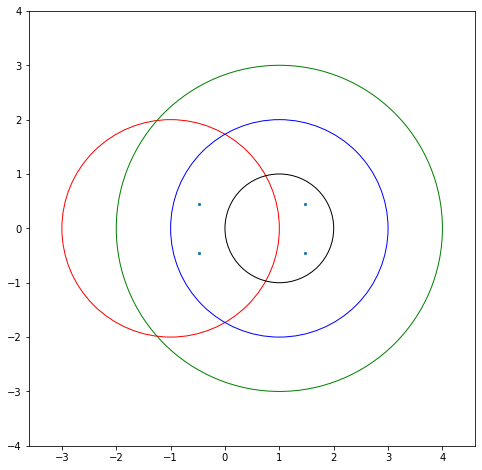

In [5]:
Gerschgorinplot = plt.figure( figsize=(8,8) )
circle0 = plt.Circle((-1, 0), 2, color='r', fill=False)
plt.gca().add_patch(circle0)
circle1 = plt.Circle((1,0), 2, color='b', fill=False)
plt.gca().add_patch(circle1)
circle2 = plt.Circle((1,0), 1, color='k', fill=False)
plt.gca().add_patch(circle2)
circle3 = plt.Circle((1,0), 3, color='g', fill=False)
plt.gca().add_patch(circle3)
x = [ee.real for ee in e]
y = [ee.imag for ee in e]
plt.scatter( x, y, s=5, marker="x")
plt.axis("equal")
plt.xlim(-4.0,5.0)
plt.ylim(-4.0,4.0)
plt.show()

\begin{equation}
\mathbf{A} = \left[\begin{array}{ccc}
-8 & 11 & -6 
\\
 -2 & 5 & -2 
\\
 8 & -8 & 6 
\end{array}\right]\>,
\end{equation}


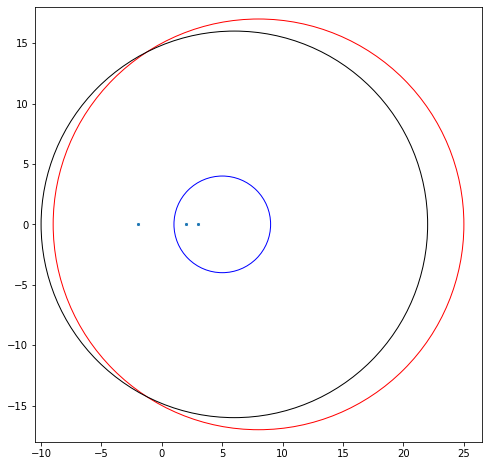

In [6]:
Gerschgorinplot = plt.figure( figsize=(8,8) )
circle0 = plt.Circle((8, 0), 17, color='r', fill=False)
plt.gca().add_patch(circle0)
circle1 = plt.Circle((5,0), 4, color='b', fill=False)
plt.gca().add_patch(circle1)
circle2 = plt.Circle((6,0), 16, color='k', fill=False)
plt.gca().add_patch(circle2)
e = [-2, 3, 2 ] # From prior computation
x = [ee.real for ee in e]
y = [ee.imag for ee in e]
plt.scatter( x, y, s=5, marker="x")
plt.axis("equal")
plt.xlim(-10.0,26.0)
plt.ylim(-18.0,18.0)
plt.show()

### Eigenvalues of the Bohemian Upper Hessenberg Toeplitz family.

Let's look at eigenvalues using our Bohemian Upper Hessenberg Toeplitz family. The $1 \times 1$ case is pretty silly: the matrix is $[t_{1}]$ and $[t_{1}] - \lambda\cdot[1]$ (the $1\times 1$ identity matrix) is just $[t_{1} - \lambda]$ with determinant $t_{1} - \lambda$. This is zero if $\lambda = t_{1}$, whatever $t_{1}$ is, $-1$, $0$, or $1$. We say that the one-by-one matrix $[t_{1}]$ has just one eigenvalue, and the eigenvalue $\lambda$ is the same as the matrix entry.  Well, in retrospect this is kind of obvious: The matrix $A$ acts like the scalar $\lambda$ if $\lambda=t_1$; sure, that's because the matrix in some sense is _only_ the scalar $t_1$.  It couldn't be anything else.

The $2\times 2$ case is more interesting:
\begin{equation*}
    \begin{bmatrix}
        t_{1} & t_{2} \\
        -1 & t_{1}
    \end{bmatrix}
    -\lambda
    \begin{bmatrix}
        1 & 0 \\
        0 & 1
    \end{bmatrix}=
    \begin{bmatrix}
        t_{1}-\lambda & t_{2} \\
        -1 & t_{1} - \lambda
    \end{bmatrix}
\end{equation*}
which is just the same kind of matrix we saw before with $t_{1}$ replaced by $t_{1} - \lambda$ (because the matrix is Toeplitz, constant along diagonals). The determinant is $t_{2} + (t_{1} - \lambda)^{2}$ and for this to be zero we must have
\begin{equation*}
    (t_{1} - \lambda)^{2} = -t_{2} 
\end{equation*}
or
\begin{equation*}
    t_{1} - \lambda = \pm\sqrt{-t_{2}}
\end{equation*}
or
\begin{equation*}
    \lambda = t_{1} \mp \sqrt{-t_{2}}
\end{equation*}
In general, these eigenvalues are complex numbers.  As we will see below, we can get some amazing pictures from this family. As an aside, the Gerschgorin circle theorem says that both eigenvalues must lie in the union of circles centred at $t_1$ and of radius at $1$ (from the second row) or $|t_2|$ from the first.  Looking at the exact eigenvalues, we see that this is true, and we are satisfied.


```{figure} ../Figures/Bohemian\ Matrices/SmallExhaustivep5_p0_p1viridis_12N177147.png
---
height: 300px
name: SmallExhaustivep5_p0_p1viridis_12N177147
---
Density plot of eigenvalues of the Bohemian Upper Hessenberg Toeplitz family plotted in the complex plane.
```

__Question:__ You counted $9 = 3^{2}$ such $2\times 2$ matrices, and each matrix has two eigenvalues. One thus naively expects $18$ eigenvalues in all. This is not so, because some eigenvalues occur twice in the same matrix (if $t_{2} = 0$) and others are shared between matrices. How many distinct eigenvalues are there?

The $3\times 3$ case gives the game away: the determinant of
\begin{equation*}
    \begin{bmatrix}
        t_{1} - \lambda & t_{2} & t_{3} \\
        -1 & t_{1} - \lambda & t_{2} \\
        & -1 & t_{1} - \lambda
    \end{bmatrix}
\end{equation*}
is $t_{3} + 2t_{2}(t_{1} - \lambda) + (t_{1} - \lambda)^{3}$, a cubic polynomial obtained by replacing every $t_{1}$ by $t_{1} - \lambda$ in the original formula $t_{3} + 2t_{2}t_{1} + t_{1}^{3}$.

__Question (Another open question):__ How many distinct eigenvalues arise from the $n\times n$ Bohemian upper Hessenberg Toeplitz matrices?

We see a connection between eigenvalues and polynomials (the so-called "characteristic polynomial").  The standard theory says that eigenvalues are the roots of these characteristic polynomials.  We have "reduced" the eigenvalue problem to two problems: compute the characteristic polynomial, and then find the roots of the characteristic polynomial.

Nowadays, we turn this on its head, though. We have robust software to solve eigenvalue problems directly. In Matlab, the command is `eig`, while in Maple it's `Eigenvalues` in the Linear Algebra package. In Python there is [numpy.linalg.eigvals](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvals.html) So we leave polynomials out of the equation for computing eigenvalues.  If we want eigenvalues, we compute them directly. This turns into a valuable tool (even for multivariate problems).

What was that special thing that we mentioned earlier about commuting matrices?  The special thing is that if $\mathbf{A}$ and $\mathbf{B}$ commute, that is, $\mathbf{A}\mathbf{B} = \mathbf{B}\mathbf{A}$, then they _share eigenvectors_.  Rather than give a proof here, we just ask you to try it and see.  Take a random matrix $\mathbf{A}$.  Make a matrix $\mathbf{B}$ by taking a polynomial combination of $\mathbf{A}$&mdash;that is, choose some coefficients $c_0$, $c_1$, and so on; then put $\mathbf{B} = c_0 \mathbf{I} + c_1 \mathbf{B} + \cdots + c_k \mathbf{B}^k$ will guarantee that $\mathbf{A}$ and $\mathbf{B}$ will commute.  Try it!

We'll still use polynomials (sometimes) for _counting_ eigenvalues and as occasional checks on our eigenvalue computations.  And if there are only a "few" polynomials (compared to the number of matrices) then we will use them instead, but cautiously.

But here ends our lightning introduction to Linear Algebra.  

The code below uses the same method of iterative construction of all possible Bohemian matrices with the given population, but instead of computing determinants, it directly computes and plots eigenvalues.  This works for _very_ small dimension, but the plot gets very crowded very quickly. To produce instead the nice images in the gallery at [bohemianmatrices.com](http://www.bohemianmatrices.com/gallery/) we used _density plots_.  We will show you how to do these in Python shortly.

The number of possible matrices is  19683
Each matrix has  3 eigenvalues 
So the total number of eigenvalues will be  59049
Although, to be sure, some of those eigenvalues will be identical.


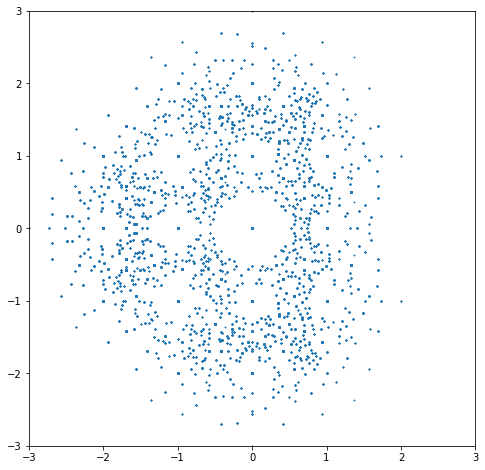

In [7]:
population = [-1,-1j,1j]
mdim = 3 # Don't use mdim=4; there are more than 43 million cases
# Let's look at general (dense, or full) matrices of dimension mdim by mdim 
# (don't use mdim too big here, the picture gets too crowded)
sequencelength = mdim*mdim # There are sequencelength entries in each matrix
# Generate (one at a time) all possible choices for
# vector elements
possibilities = itertools.product( population, repeat=sequencelength )
possible = iter(possibilities)
# Enumerate all lists of possible population choices
nchoices = len(population)**sequencelength
print("The number of possible matrices is ", nchoices)
print("Each matrix has ", mdim, "eigenvalues ")
print("So the total number of eigenvalues will be ", mdim*nchoices )
print("Although, to be sure, some of those eigenvalues will be identical.")
alleigs = np.zeros(mdim*nchoices,dtype=complex)  # Preallocate the space (useful in some languages)
for n in range(nchoices):
    s = next(possible)
    a = np.reshape([s[k] for k in range(sequencelength)],(mdim,mdim))
    e = np.linalg.eigvals( a ) 
    for k in range(mdim):
        alleigs[n*mdim+k] = e[k]  # keep the eigenvalues in the big preallocated vector

# Now split the eigenvalues into real and imaginary parts
x = [e.real for e in alleigs]
y = [e.imag for e in alleigs]

# A simple scatter plot of the eigenvalues.
eigplot = plt.figure( figsize=(8,8) )
plt.scatter( x, y, s=1.5, marker=".")
plt.xlim(-3.0,3.0)
plt.ylim(-3.0,3.0)
plt.show()


Looking back at that picture, several questions occur immediately.  First, there are those big empty spaces around the integer eigenvalues!  Look at $0$ in particular&mdash;it's as if the eigenvalues are allergic to the zero eigenvalue!  But $0$ actually occurs as an eigenvalue for a lot of those matrices: the zero dot in the middle gets hit a _lot_ of times.  Then there are smaller holes around $-1$, $-2$, $1$, $1+i$, $i$, $-1+i$, $-1-i$, $-i$, $1-i$, and some others; maybe $\pm 2i$.  What is going on?  

Second, the shape is asymmetric, with more eigenvalues on the left than on the right.  Why?  Is that an accident, or a consequence of something deeper?  Certainly we can't answer these questions without further investigation.

(BohemianActivity-6)=

```{admonition} Bohemian Activity 6
:class: tip

Can you see any _other_ interesting features of this graph?  What questions would _you_ ask?  Write some down.
What other Bohemian questions can you think of?

{ref}`[Some of our questions] <BohemianActivityReport-6>`
```

Some (maybe most) of the questions we have about pictures like these are actually open; _no one_ knows the answers.

What to do if you solve one of the open problems listed here: write up your proof carefully, and sent it to a friendly journal. If you use Maple, we suggest the new journal, [Maple Transactions](https://mapletransactions.org/index.php/maple), or if not using Maple, ACM Communication in Computer Algebra; or perhaps the journal Experimental Mathematics. Please send us a copy too!

What to do it you find that sombody's already solved one or more of these (and so the problem was _not_ open and we just didn't know): let us know!

## Bohemian Matrices: Population and Structure

The set of possible entries of the matrices is called the _population_ (a name coined by Cara Adams, while doing her BSc Honours Thesis on Bohemian Eigenvalues). For the introductory example, the population was $\mathbb{P} = \{-1, 0, 1\}$. This is quite an interesting population and we'll use it frequently, but it's by no means the only interesting one. Other examples include $\mathbb{P} = \{-2, -1, 0, 1, 2\}$, or $\mathbb{P} = \{-1, 1\}$, or $\mathbb{P} = \{0, 1\}$, or even $\mathbb{P} = \{-1, -i, 0, i, 1\}$ where $i = (0, 1)$ is the square root of $-1$.  Python uses the letter "j" for this, as is common in electrical engineering; one can use it in Python by writing a number as $1+0j$ for the complex copy of the number $1$, for instance, or $3+2j$ for the complex number $3 + 2\sqrt{-1}$, which we are used to writing as $3+2i$.  This works even if you have a variable named "j" that is doing something else: just don't write $2*j$ which would invoke that variable.  $2j$ means $2\cdot\sqrt{-1}$ whereas $2*j$ means twice whatever you have in variable "j" (if you have one).

In the experimental setup described below we have found it useful to be _systematic_ about this (at least a little bit).  In order to help keep things organized, we decided to codify the population being studied.  As a first step, we labelled the lattice of complex integers (also called [Gaussian Integers](https://en.wikipedia.org/wiki/Gaussian_integer)). We start at zero with the label "0"; step to the right, and label $(1,0) = 1 + 0i$ as "1"; then go around the origin clockwise numbering each lattice point. When we reach $(1,-1) = 1-i$, step up to the $x$-axis and to the right to $(2,0) = 2 + 0i$ and label that "9". Do it again. The result is pictured here, going up to label "24".  One could continue but this suffices to get the idea across.

<!-- ![Labelled Lattice Points](/Figures/Bohemian Matrices/labelledlatticepoints.png)

![image.png](attachment:image.png)
 -->

```{figure} ../Figures/Bohemian\ Matrices/labelledlatticepoints.png
---
height: 300px
name: Labelled Lattice Points
---
The labelling scheme for the points we commonly use as populations: 0 is 0, 1 is 1, 2 is 1+j, 3 is j, 4 is -1 + j, and so on.
```

In [8]:
populationlist = [complex(0,0),complex(1,0),complex(1, 1),complex(0, 1),complex(-1, 1),complex(-1,0),complex(-1, -1),complex(0, -1),complex(1, -1),
                               complex(2,0),complex(2, 1),complex(2, 2),complex(1, 2),complex(0, 2),complex(-1, 2),complex(-2, 2),complex(-2, 1),
                               complex(-2,0),complex(-2, -1),complex(-2, -2),complex(-1, -2),complex(0, -2),complex(1, -2),complex(2, -2),complex(2, -1)]

The idea is that the population $(-1,0,1)$ is encoded as the tuple 5, 0, 1; or $(p_5, p_0, p_1)$ if you prefer.  Order does not matter for us.  The population $(0,i)$ is encoded as the tuple 0, 3; or $(p_0, p_3)$ if you prefer.  This doesn't allow for populations that contain other things, like $\pi$ and so on; but there are an uncountable number of things that _could_ happen and while no doubt there are better systems for more complicated situations, we're going to stick to Gaussian integers for now, and so this system will suffice.  Now there is a natural stratification: populations with only one entry; then populations with only two entries, then three, and so on.  The notion of the height of the resulting matrix also shows up (sort of) in the size of the label for the entry.  We will try to record our images (or other data) in files with names that reflect the population, and we will use Python string manipulation to automatically generate those names as a hedge against human error, together with the dimension and the matrix structure, which we'll talk about now.

The other main variable in the study of Bohemian matrices in the _structure_ of the matrices in the family. The family in {ref}`sec:a-lightning-introduction-to-matrices` was required to be zero below the 1<sup>st</sup> subdiagonal, have $-1$ on its 1<sup>st</sup> subdiagonal, and be constant along each diagonal: each matrix was upper Hessenberg and Toeplitz. There are many named structures of matrices that occur in practice, owing to natural correlations in the system being modelled. Here are a few structures, with pictures of Bohemian eigenvalues using various populations.

### A. General family ("dense" or "full" matrices)
Any entry of a general (or full or dense) matrix can be any selection from $\mathbb{P}$. Denoting the size of the population by the notation $\#P$, the number of different general Bohemian matrices of dimension $n$ is
\begin{equation*}
    G(n) = \#P^{n^{2}} \>.
\end{equation*}

For the case $\mathbb{P} = \{-1, 0, 1\}$, $\#P = 3$ and there are $3^{1}$ $1 \times 1$ matrices, $3^{4} = 81$ $2 \times 2$ matrices, $3^{9} = 19,683$ $3\times 3$ matrices, $3^{16} = 43,046,721$ $4\times 4$ matrices, and $3^{25} = 847,288,309,473$ (over $847$ billion) $5\times 5$ matrices. $G(n)$ grows faster than exponentially; it grows faster than $n! = n(n-1)(n-2)\cdots2\cdot 1$. Much faster.
Most properties of the general family with a given population $\mathbb{P}$ remain to be discovered, as we write this, even though several trillion matrix eigenproblems have been solved (mostly by Steven Thornton) in the search.

We have imported our own code for dealing with Bohemian matrices.  For various reasons, we decided on an object-oriented approach, which will allow you to extend the code with different structures in a (hopefully!) straightforward manner.

We do stress that the code is written for _readability_ and for correctness on small matrices; it uses (in general) the so-called Fadeev-Leverrier method for computing the characteristic polynomial, which is known to be $O(n^4)$ whereas the fastest general algorithms are $O(n^3)$ (here $n$ is the dimension of the problem).  Even for $n=4$ this is too slow, really.  But it is _very simple_ (as these things go) and so we have left it this way (for now).  For some of the structures (upper Hessenberg, and upper Hessenberg Toeplitz, we have implemented cheaper methods.

Have a look at the file `bohemian_inheritance.py` (use your favourite text editor, or, well, open the file in Jupyter notebooks).  Read the code.  Really.

In [9]:
U = [-1, 1, -1, -1, 0, 1, 1, 1, -1, 1, 1, 1, 0, 0, 1, 0]
A = Bohemian(4, U)
M = A.getMatrix() # This is Object-Oriented (OO) style.  Objects know things about themselves.
print('Matrix:\n', M)
print('Number of Matrix Entries:', A.getNumberOfMatrixEntries())
print('Characteristic Polynomial:', A.characteristicPolynomial())
print('Determinant:', A.determinant())

Matrix:
 [[-1  1 -1 -1]
 [ 0  1  1  1]
 [-1  1  1  1]
 [ 0  0  1  0]]
Number of Matrix Entries: 16
Characteristic Polynomial: [ 2  0 -4 -1  1]
Determinant: 2


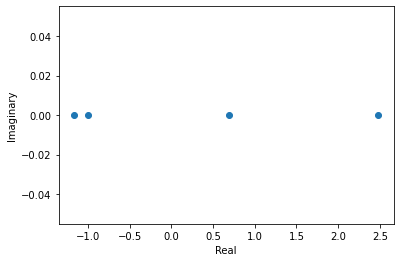

In [10]:
A.plotEig()

In [11]:
B = Bohemian(4)
print("B is\n", B.getMatrix()) # Initially zero because why not?

B is
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [12]:
B.makeMatrix(U)
print("B is now\n", B.getMatrix())

B is now
 [[-1  1 -1 -1]
 [ 0  1  1  1]
 [-1  1  1  1]
 [ 0  0  1  0]]


Here are some examples of the kind of question one can investigate with this code. First, in what follows, we compute all the characteristic polynomials for all the matrices of a given dimension with the chosen population (we chose a 2-element population, $-1 \pm j$, for no particular reason), and look for one that occurs the most often (there may be more than one that occurs this often&mdash;this code is crude and just selects one that occurs the most number of times).  If we take mdim=3 and the population only has two elements, it takes a fraction of a second; if we take mdim=4, then it takes 17 seconds ($2^{16} = 65,536$ matrices instead of $2^9 = 512$, which is 128 times as many; and they are bigger so the computation cost per matrix is also more).  If we tried mdim=5, then there would be $2^{25}$ which is more than $32$ million matrices, 512 times as many: we would expect it to take, say, $512 \cdot 17 \approx 8700$ seconds or about $2.4$ hours (but actually more because it's working with $5$ by $5$ matrices instead of $4$ by $4$, which suggests $6$ hours rather than $2.4$ (because an $O(N^4)$ algorithm for characteristic polynomial is being used, which is inefficient: and $(5/4)^4 \approx 2.4$ as well; and $2.4$ times $2.4$ is about $6$.  So this exhaustive code is really only good for small dimension matrices!

In [13]:
mdim = 3
A = Bohemian(mdim)
pcode = [4,6] # Code from the above figure: indexes into populationlist which was defined above.
population = [populationlist[p] for p in pcode]
sequencelength = A.getNumberOfMatrixEntries()
numberpossible = len(population)**sequencelength  # Each entry of the sequence is one of the population
# Generate (one at a time) all possible choices for
# vector elements: this is what itertools.product does for us.
possibilities = itertools.product( population, repeat=sequencelength )
possible = iter(possibilities)
# We will count the number of unique characteristic polynomials.
charpolys = {}
maxcount = 0
start = time.time()
for p in possibilities:
    A.makeMatrix(p)
    cp = tuple(A.characteristicPolynomial())
    if cp in charpolys.keys():
        charpolys[cp] += 1
        if charpolys[cp]>maxcount:
            maxcount = charpolys[cp]
            mostcommon = cp
            pattern = p
    else:
        charpolys[cp] = 1
finish = time.time()
print( "Program took ", finish - start, " seconds \n")
print( "There are ", len(charpolys), "distinct characteristic polynomials, vs ", len(population)**sequencelength, "matrices")
print( "A most common characteristic polynomial was ", mostcommon, "which occurred ", maxcount, "times ")
A.makeMatrix(pattern)
print( "One of its matrices was ",A.getMatrix() )

Program took  0.05282902717590332  seconds 

There are  68 distinct characteristic polynomials, vs  512 matrices
A most common characteristic polynomial was  ((-0+0j), (-0+0j), (3-1j), (1+0j)) which occurred  18 times 
One of its matrices was  [[-1.-1.j -1.-1.j -1.-1.j]
 [-1.+1.j -1.+1.j -1.+1.j]
 [-1.+1.j -1.+1.j -1.+1.j]]


Another thing we can do is make density plots of the eigenvalues (we will explore this in more detail below, for other matrix structures).  First, we take a random sample of matrices, and time things.

25 33554432


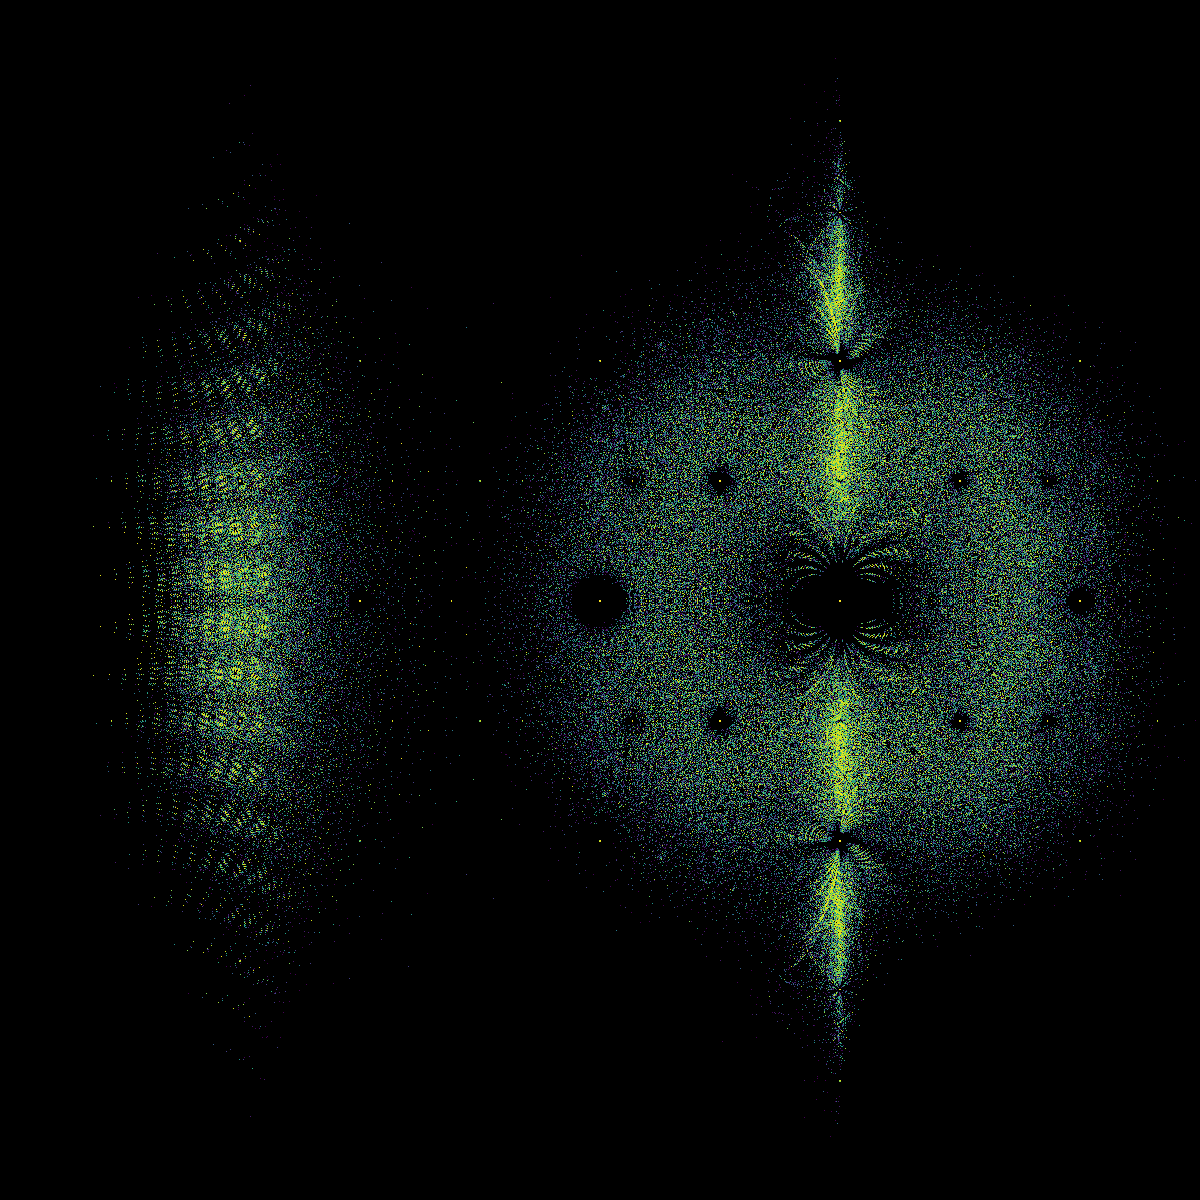

Took 65.41827511787415 seconds to compute and plot 


In [14]:
Nsample = 5*10**5 # a bit more than 5 minutes for 5 million matrices of dimension 5 (all of them in 40 minutes, maybe?)
mdim = 5
pcode = [4,6]
population = [populationlist[p] for p in pcode] 
A = Bohemian(mdim)
sequencelength = A.getNumberOfMatrixEntries()
numberpossible = len(population)**sequencelength
print( sequencelength, numberpossible )
# Make this reproducible, for testing purposes: choose a seed
random.seed( 21713 )

start = time.time()
bounds = [-7,3,-5,5] # Found by experiment, but Gerschgorin could have told us
nrow = 1200
ncol = 1200
image = DensityPlot(bounds, nrow, ncol)
for k in range(Nsample):
    A.makeMatrix([ population[random.randrange(len(population))] for j in range(sequencelength)])
    image.addPoints(A.eig())

# We encode the population into a label which we will use for the filename.
poplabel = "_".join([str(i) for i in pcode])
cmap = 'viridis'
fname = '../Supplementary Material/Bohemian/dense/pop_{}_{}_{}N{}.png'.format(poplabel,cmap,mdim,Nsample)
image.makeDensityPlot(cmap, filename=fname, bgcolor=[0, 0, 0, 1], colorscale="cumulative")
finish = time.time()
print("Took {} seconds to compute and plot ".format(finish-start))

We are currently in a "how to do things in Python" mode and not in a "what does that picture _mean_" mode, but we really have to stop and ask some questions about that picture.  First, it kind of looks like a fish, to some of us.  There are certainly two portions, one that (sort of) looks like a fish tail, and the other like a fish body (complete with dorsal and ventral fins).  [Maybe a sunfish](https://en.wikipedia.org/wiki/Ocean_sunfish) or [Maybe a moonfish, or Opah](https://en.wikipedia.org/wiki/Opah).  Ok, that's just human pareidolia talking---we see patterns when there aren't any.

But _why_ are there two distinct blobs? (We don't know).  Why does the "tail" look as though it's got stripes? (We don't know).  Why is the "body" quite round, except for the "fins"? (We don't know). Why is there a diffraction pattern around the origin? (We _kind of_ know). Why are there bright curved rays coming from $\pm i$? (We don't know).  Why is there a bright line around the $y$-axis? (We maybe have an idea about that; but nobody has pursued that idea yet).

```python
# We tried this with mdim = 4, first, and by sampling 5 million mdim=5 ones above, to get a sense of computing time.
mdim = 5 # We thought that this exhaustive computation would take about 40 minutes; it actually took about 33 minutes
pcode = [4,6]
population = [populationlist[p] for p in pcode]
A = Bohemian(mdim)
sequencelength = A.getNumberOfMatrixEntries()
numberpossible = len(population)**sequencelength
print( sequencelength, numberpossible )
possibilities = itertools.product( population, repeat=sequencelength )
possible = iter(possibilities)
# We will count the number of unique characteristic polynomials.
charpolys = {} # Make a dictionary of charpolys
maxcount = 0
start = time.time()
bounds = [-6.5,3.5,-5,5]
nrow = 1200
ncol = 1200
image = DensityPlot(bounds, nrow, ncol)
for p in possibilities:
    A.makeMatrix(p)
    image.addPoints(A.eig())

poplabel = "_".join([str(i) for i in pcode])
cmap = 'viridis'
fname = '../Supplementary Material/Bohemian/dense/exhaustivep_{}_{}_{}N{}.png'.format(poplabel,cmap,mdim,numberpossible)
image.makeDensityPlot(cmap, filename=fname, bgcolor=[0, 0, 0, 1], colorscale="cumulative")
finish = time.time()
print("Took {} seconds to compute and plot ".format(finish-start))
```

```python
Once built, it's easy to change colours
cmap = 'ocean'
fname = '../Supplementary Material/Bohemian/dense/whiteexhaustivep_{}_{}_{}N{}.png'.format(poplabel,cmap,mdim,numberpossible)
image.makeDensityPlot(cmap, filename=fname, bgcolor=[1, 1, 1, 1], colorscale="cumulative")
```

Probably a hundred puzzles arise from those pictures!  We suggest that you take some time and write down some questions that occur to you in looking at them.  Other questions that occurred to us include "Why are there holes near certain eigenvalues?" and "How can we predict ahead of time where all the eigenvalues will be?" and "Did we actually capture _all_ the eigenvalues?" 

Frankly, we don't know the answers to most of those questions.  We are confident that you can come up with more questions that we can't answer, either!  We're curious as to what you come up with.

__Seventh Activity__ Come up with some questions!

Now let's look at another class of Bohemian matrices: _symmetric_ Bohemians.  We gave code for these in the file `bohemian_inheritance.py`, together with code for some other structures.

### B. Symmetric family
A matrix $\mathbf{A}$ is symmetric if $\mathbf{A} = \mathbf{A}^{T}$&mdash;the transpose operation rotates $\mathbf{A}$ $180^{\circ}$ over its main diagonal: $a_{ij}^{T} = a_{ji}$,

\begin{equation*}
    \begin{bmatrix}
        1 & 2 & 3 \\
        4 & 5 & 6 \\
        7 & 8 & 9
    \end{bmatrix}^{\mathrm{T}} =
    \begin{bmatrix}
        1 & 4 & 7 \\
        2 & 5 & 8 \\
        3 & 6 & 9 \\
    \end{bmatrix}
\end{equation*}
&mdash;and _unitary_ if $\mathbf{A} = \mathbf{A}^{\mathrm{H}} := \bar{\mathbf{A}}^{\mathrm{T}}$ (take the complex conjugate and the transpose).
    
You will learn in a standard linear algebra course that eigenvalues of unitary matrices, and of _real_ symmetric matrices, are real. The pictures of the eigenvalues of these matrices are best understood as distributions. These are very well studied families, especially in physics: see the [Wigner semicircle distribution](https://en.wikipedia.org/wiki/Wigner_semicircle_distribution).  We're going to stay away from what's known, but you should be aware that there is a lot of interest, both academic and engineering, in the topic of _Random Matrices_ and especially of random symmetric matrices.

Much less is known about the eigenvalues of _complex symmetric_ matrices (not unitary, and not real, but symmetric). For instance
\begin{equation*}
    \begin{bmatrix}
        2 & i \\
        i & 2
    \end{bmatrix}
\end{equation*}
is complex symmetric and has eigenvalues that satisfy $(\lambda-2)^{2} + 1 = 0 \Rightarrow \lambda = 2 \pm i$. Bohemian eigenvalues of complex symmetric matrices with various populations $\mathbb{P}$ (which have to include some non-real numbers to be interesting in this context) are almost completely unexplored.

__Eighth Activity:__ Choose a population of numbers (not necessarily integers, but include something complex like $i$ or $\frac{1}{1+i}$ or whatever) and a modest dimension, and plot the Bohemian eigenvalues of, say, a few million matrices from your chosen or invented matrix family. Discuss.

_Remark._ $S_n= p^{\frac{n(n+1)}{2}}$ is the number of symmetric $n \times n$ matrices with entries from population $\mathbb{P}$ of size $p$. Compute the first few for $p = 3$ and see that these grow vastly more slowly than $p^{n^{2}}$ but still vastly faster than factorial.

We have run the following code snippet with several different choices for mdim and population, and tabulated the results in the second cell below this one.  For some choices of mdim and population, the computation took hours; we saved the results and they can be read in again if we want to work with them.  This makes sense because there is very significant _compression_ of the data because while there are a lot of matrices, there are vastly fewer characteristic polynomials: many matrices share characteristic polynomials, and therefore eigenvalues.

We used [JSON](https://en.wikipedia.org/wiki/JSON) (JavaScript Object Notation) to save the data; it required a bit of fiddling because we were using tuples (representing polynomial coefficients) as dictionary keys, which JSON doesn't like; so we have to convert those to strings before saving, and convert them back to tuples (using `ast.literal_eval`) once we read them it.  But this is simple enough.  One side benefit of using JSON is that Maple can read the files, too, so we can share data between Python and Maple.

In [15]:
mdim = 4
A = Symmetric(mdim)
pcode = [5,0,1] # again the same code
poplabel = "_".join([str(i) for i in pcode])
population = [populationlist[p] for p in pcode]
sequencelength = A.getNumberOfMatrixEntries()
numberpossible = len(population)**sequencelength
# Generate (one at a time) all possible choices for
# vector elements
possibilities = itertools.product( population, repeat=sequencelength )
possible = iter(possibilities)
charpolys = {}

start = time.time()
for p in possibilities:
    A.makeMatrix(p)
    cp = tuple(A.characteristicPolynomial())
    if cp in charpolys.keys():
        charpolys[cp] += 1
    else:
        charpolys[cp] = 1
finish = time.time()
print( "Program took ", finish - start, " seconds \n")
print( "There are ", len(charpolys), "distinct characteristic polynomials, vs ", len(population)**sequencelength, "matrices")
# #Now let's try to save that collection of characteristic polynomials (useful when mdim is large)
# 
fname = '../Supplementary Material/Bohemian/symmetric/exhaustivecharpolys_pop_{}_m{}_N{}.json'.format(poplabel,mdim,numberpossible)
out_file = open(fname, "w")
json.dump({str(k): v for k, v in charpolys.items()}, out_file)
out_file.close()


Program took  17.82421565055847  seconds 

There are  489 distinct characteristic polynomials, vs  59049 matrices


#### Number of distinct characteristic polynomials for symmetric Bohemians with various populations


| dimension | $(-1,1)$    |    $(-1, i)$  |     $(-1,0,i)$       |   $(-1,i,-i)$      |  $(-1,0,1)$       |
|-----------|-------------|---------------|----------------------|--------------------|-------------------|
| 1         |  2 (2)      |    2 (2)      |       3 (3)          |     3 (3)          |    3 (3)          |
| 2         |  3 (8)      |    6 (8)      |      18 (27)         |    12 (27)         |   11 (27)         |
| 3         |  8 (64)     |   20 (64)     |     154 (729)        |    99 (729)        |   58 (729)        |
| 4         | 19 (1,024)  |   90 (1,024)  |    2900 (59,049)     |  1639 (59,049)     |  489 (59,049)     |
| 5         | 68 (32,768) |  538 (32,768) |  131196 (14,348,907) | 75415 (14,347,907) | 8977 (14,348,907) |

The number in brackets is the number of matrices with that population at that dimension.  We did not immediately run the program for n=5, anticipating that it would take too long. For dimension=5 and population = (-1,1) the program took over a hundred seconds. For dimension 4 and population = (-1,0,1) it took 75 seconds; this suggests that each of the nearly 60,000 computations was cheaper than (less than about half the cost of) the dimension 5 computations. A back-of-the-envelope estimate then suggested that filling in that bottom-corner entry would take about 11 hours of computation, requiring an overnight run. It actually took $42451$ seconds, or $11.8$ hours, which made one of us quite smug.  Perhaps surprisingly, the population $(-1,0,i)$ was much faster: at $m=5$ the computation only took $2.5$ hours.  We suspected that this was because floating-point arithmetic was used in that case; we changed to use floating-point in all cases and were pleasantly surprised when each of the 3-element population runs with $m=5$ took about $2.5$ hours, so all three could be done in a single run.

Now let us plot a _density plot_ of the (real) eigenvalues of that symmetric case with $m=5$ and population $(-1,0,1)$ which we just read in the polynomials for.

In [16]:
# Read in the big pile of characteristic polynomials from the m=5 P=(-1,0,1) computation.
mdim = 5
A = Symmetric(mdim)
pcode = [5,0,1]
poplabel = "_".join([str(i) for i in pcode])
population = [populationlist[p] for p in pcode]
sequencelength = A.getNumberOfMatrixEntries()
numberpossible = len(population)**sequencelength
fname = '../Supplementary Material/Bohemian/symmetric/exhaustivecharpolys_pop_{}_m{}_N{}.json'.format(poplabel,mdim,numberpossible)
print( fname )
in_file = open(fname,"r")
saved_charpolys = json.load(in_file)
in_file.close()
charpoly_tuple_dict = {ast.literal_eval(k): v for k, v in saved_charpolys.items()}

../Supplementary Material/Bohemian/symmetric/exhaustivecharpolys_pop_5_0_1_m5_N14348907.json


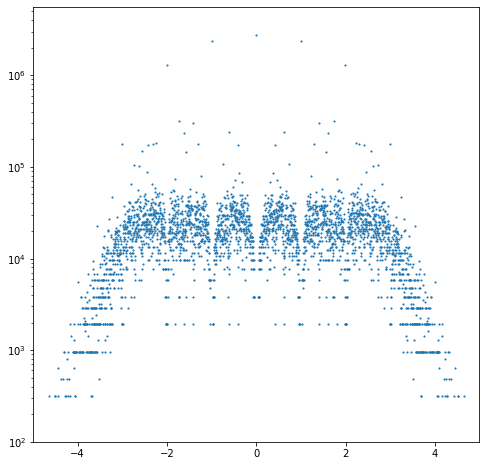

In [17]:
nbins =4001 # number of bins for the histogram count: x[k] = -5 + 10*k/nbins, 0 <= k <= nbins
histo = np.zeros(nbins)
for ptuple in charpoly_tuple_dict.keys():
    pol = Poly([c for c in ptuple])
    rts = pol.roots()
    for xi in rts:
        k = math.floor( (xi.real+5)*nbins/10 )
        if k>=nbins:
            k = nbins-1
        histo[k] += charpoly_tuple_dict[ptuple]
big = max(histo)
histplot = plt.figure( figsize=(8,8) )
plt.scatter( [-5+ 10*k/nbins for k in range(nbins)], histo, s=5, marker=".")
plt.yscale("log",nonpositive='clip')
plt.xlim(-mdim,mdim)
plt.ylim(100,2*big)
plt.show()

That code above, after the multi-hour run to get the 8977 characteristic polynomials as recorded in the bottom right corner, does a histogram of those eigenvalues, which are all real. Here is that figure, simply read in: as you can see, there are decided gaps in the histogram (the vertical gaps at -2, -1, 0, 1, and 2; the horizontal gaps are just artifacts of counting). This means that there are fewer roots in the neighbourhood of those points.  This is the one-dimensional analogue of the "holes" in the complex plots that we saw before and will show you more of next.  Because the matrices are symmetric and the entries are real, all the eigenvalues are constrained to be real.


As we saw previously, we can also make a histogram (density plot) for _complex_ eigenvalues.  We now talk about how to do that.
<!-- For the population $(-1,0,i)$ above, with $m=5$, we read the data produced above into Maple and used our existing density plot software to make the following image:
 -->
<!-- ![Density plot of roots of all 131,196 degree 5 polynomials](FromPython.png)
 -->
<!-- This image is "upside-down" --- the $y$-axis is pointing downwards --- but gives a sense of where most eigenvalues lie in the rectangle $-5 \le \Re(\lambda) \le 3$ and $-3 \le \Im(\lambda) \le 5$.  Hotter colours indicate higher density. -->

### C. Skew-symmetric matrices
This family of matrices are also called antisymmetric matrices. Given a matrix $\mathbf{A}$, skew-symmetric matrices have $\mathbf{A} = -\mathbf{A}^{\mathrm{T}}$.

__Ninth Activity__ Choose a population $\mathbb{P}$ (which now kind of includes $-c$ if it includes $c$) and plot the eigenvalues of the $n \times n$ skew-symmetric Bohemian matrices that result. Compare those on __[bohemianmatrices.com/gallery](http://www.bohemianmatrices.com/gallery/)__. See also [What can we learn from Bohemian matrices?](https://doi.org/10.5206/mt.v1i1.14039) and  [Skew-symmetric tridiagonal Bohemian matrices](https://mapletransactions.org/index.php/maple/article/view/14360).  Discuss.

Other questions that arise here (in those references) are, "how many matrices in this collection _only_ have the zero eigenvalue?"  This kind of matrix is called "nilpotent" because $A^m = 0$, the zero matrix, if it only has zero eigenvalues. How many _normal_ matrices are there?  (A matrix is called "normal" if it commutes with its transpose; normal matrices have lots of nice properties.  Not all matrices are normal, and indeed non-normality occurs in applications and has nontrivial consequences). 

In [18]:
mdim = 4
A = SkewSymmetric(mdim)
pcode = [1,0,3]
population = [populationlist[k] for k in pcode]
sequencelength = A.getNumberOfMatrixEntries()
possibilities = itertools.product(population, repeat=sequencelength)
possible = iter(possibilities)
numberpossibilities = len(population)**sequencelength
nilpotents = set()
nils = 0
normals = []
orthogonals = []
unitaries = []


start = time.time()
for k in range(numberpossibilities):
    p = next(possible)
    A.makeMatrix(p)
    Ai = A.getMatrix()
    At = np.transpose(Ai) # Ai.T if you prefer an OO style
    Ah = np.conj(np.transpose(Ai)) # Ai.conj().T likewise
    # A matrix is "normal" if it commutes with its conjugate transpose
    NN = Ai.dot(Ah) - Ah.dot(Ai)
    if la.norm(NN,1)==0:
        normals.append(p)
    # A matrix is "unitary" if its conjugate transpose is its inverse
    # (So unitary matrices are "normal")
    UN = Ai.dot(Ah) - np.identity(mdim)
    if la.norm(UN,1)==0:
        unitaries.append(p)
    # A matrix is "orthogonal" if its simple transpose is its inverse
    # Double counting if Ai is real (then At = Ah)
    UO = Ai.dot(At) - np.identity(mdim)
    if la.norm(UO,1)==0:
        orthogonals.append(p)
    cp = A.characteristicPolynomial()
    trail = list(cp[:mdim])
    if not any(trail):
        nils += 1
        nilpotents.add(tuple(cp))
finish = time.time()
print( "Program took ", finish - start, " seconds \n")
print( "Found", nils, "nilpotent polynomial(s), vs ", len(population)**sequencelength, "matrices")
print( "Found", len(normals), "normal matrices")
print( "Found", len(unitaries), "unitary matrices")
A.makeMatrix( orthogonals[0] )
print( "Found", len(orthogonals), "orthogonal matrices, e.g. \n", A.getMatrix() )

Program took  0.28572583198547363  seconds 

Found 35 nilpotent polynomial(s), vs  729 matrices
Found 143 normal matrices
Found 12 unitary matrices
Found 3 orthogonal matrices, e.g. 
 [[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [-1.-0.j  0.+0.j  0.+0.j  0.+0.j]
 [-0.-0.j -0.-0.j  0.+0.j  1.+0.j]
 [-0.-0.j -0.-0.j -1.-0.j  0.+0.j]]


The population $[1,i]$ is special amongst skew-symmetric _tridiagonal_ matrices; if we include $0$ in the population as well, then that family is included in the set of general skew-symmetric matrices.  We were interested in the number of nilpotent matrices in that family; this means that all eigenvalues are zero.  There are some, at every tested dimension (this is different to the tridiagonal case).

### D. Toeplitz matrices, Hankel matrices
Toeplitz matrices are constant along diagonals:
\begin{equation*}
    \begin{bmatrix}
        \pi & 1 & 7 & -3 \\
        -1 & \pi & 1 & 7 \\
        -2 & -1 & \pi & 1 \\
        -3 & -2 & -1 & \pi
    \end{bmatrix} .
\end{equation*}
Hankel matrices (named for [Hermann Hankel](https://en.wikipedia.org/wiki/Hermann_Hankel)) are constant along _anti_-diagonals:
\begin{equation*}
    \begin{bmatrix}
        -3 & 7 & 1 & e \\
        7 & 1 & e & -2 \\
        1 & e & -2 & 2 \\
        e & -2 & 2 & 4
    \end{bmatrix} .
\end{equation*}
If _J_ is the "exchange matrix", also called the SIP matrix for Self-Involutory Permutation matrix, also called the anti-identity, and H is a Hankel matrix, then T = HJ is a Toeplitz matrix.

__Tenth Activity__: write your own class for Toeplitz matrices and choose a population and plot eigenvalues of all matrices of modest dimension.  You might also recapitulate some of the other questions above: what is the number of singular such matrices? The maximum determinant that can occur? The number of distinct characteristic polynomials?  The number of distinct eigenvalues (to answer that question precisely, you may have to resort to GCD computations).

__Remark__: Toeplitz matrices turn out to be connected to some very deep mathematical waters indeed, and some of those deep currents turn out to be instrumental in explaining the appearance of many of the pictures of Bohemian upper Hessenberg Toeplitz matrices.  We (mostly) leave those explanations alone, here.

### E. Circulant matrices
Circulant matrices are special Toeplitz matrices: each row is the previous row, rotated:
\begin{equation*}
    \begin{bmatrix}
        a & b & c & d & e \\
        e & a & b & c & d \\
        d & e & a & b & c \\
        c & d & e & a & b \\
        b & c & d & e & a
    \end{bmatrix} .
\end{equation*}
(If the rows were rotated the other way, you would get special Hankel matrices instead.) Eigenvalues of these can be found by using the FFT. The first explorations of Bohemian circulant matrices were done by Jonathan Bri&ntilde;o-Tarasoff, and there is work in progress by another student, Cristian Ardelean, and still more by Leili Rafiee Sevyeri.  There is still a lot unknown about Bohemian circulants.

__Eleventh Activity__ Write your own implementation of circulant matrices.  You may wish to start fresh, because these matrices have some very interesting properties, including that they are diagonalized by the FFT, and so computation with these matrices is orders of magnitude faster than computation with general matrices. 

See [The Bohemian Matrix Gallery circulant image](http://www.bohemianmatrices.com/gallery/Circulant_15x15/) created by Jonathan Briño-Tarasoff. Image is of eigenvalues of a sample of 5 million 15x15 circulant matrices. The entries are sampled from the set ${-1, 0, 1}$. This plot is viewed on $-1 \le \Re(\lambda) \le 1$, $-1 \le \Im(\lambda) \le 1$.  In a larger window, the image appears circular.

### F. Trididagonal and other banded matrices
A tridiagonal matrix has zero entries everywhere except on the subdiagonal, main diagonal, and superdiagonal: for example
\begin{equation*}
    \begin{bmatrix}
        2 & -1 & & & & \\
        -1 & 3 & -1 & & & \\
        & -1 & 4 & -1 & & \\
        & & -1 & 5 & -1 & \\
        & & & -1 & 6 & -1 \\
        & & & & -1 & 7
    \end{bmatrix}
\end{equation*}
is tridiagonal.

Pentadiagonal matrices are zero except on the $-2$, $-1$, $0$, $1$, and $2$ diagonals:
\begin{equation*}
    \begin{bmatrix}
        3 & 3 & 5 & & & & \\
        3 & 3 & 3 & 5 & & & \\
        5 & 3 & 3 & 3 & 5 & & \\
        & 5 & 3 & 3 & 3 & 5 & \\
        & & 5 & 3 & 3 & 3 & 5 \\
        & & & 5 & 3 & 3 & 3 \\
        & & & & 5 & 3 & 3
    \end{bmatrix} .
\end{equation*}
That artificial example was also symmetric, and Toeplitz.
More generally "banded" matrices might have $m$ nonzero subdiagonals and $k$ nonzero superdiagonals.

See Cara Adams' [picture of eigenvalues](http://www.bohemianmatrices.com/gallery/Tridiagonal_15x15_1/) of 100 million $15\times 15$ tridiagonal matrices with entries chosen "at random" from $\mathbb{P}=\{-1, 0, 1\}$.

In [19]:
mdim = 5
population = [1+0j,1j]
A = SkewSymmetricTridiagonal(mdim)
sequencelength = A.getNumberOfMatrixEntries()
numberpossible = len(population)**sequencelength
print( sequencelength, numberpossible )
# Make this reproducible, for testing purposes: choose a seed
random.seed( 21713 )
A.makeMatrix([ population[random.randrange(len(population))] for k in range(sequencelength)])
cp = A.characteristicPolynomial()
print(cp)
Pcp = Poly( cp ) # z -2z^3 + z^5 = z(z^2-1)^2
rts = Pcp.roots()
print( rts )
print( A.eig() ) # Same as the roots but in a different order and with different rounding errors

4 16
[ 0.+0.j -1.+0.j  0.+0.j -2.+0.j  0.+0.j  1.+0.j]
[-1.55377397e+00+1.43114687e-17j -4.84067520e-17-6.43594253e-01j
 -1.19198278e-17+6.43594253e-01j  0.00000000e+00+0.00000000e+00j
  1.55377397e+00-3.60822483e-16j]
[ 1.55377397e+00+8.32667268e-17j -1.55377397e+00-1.37043155e-16j
  1.12483026e-16+6.43594253e-01j -5.95407775e-17+5.93903629e-16j
  3.93081256e-17-6.43594253e-01j]


30 1073741824


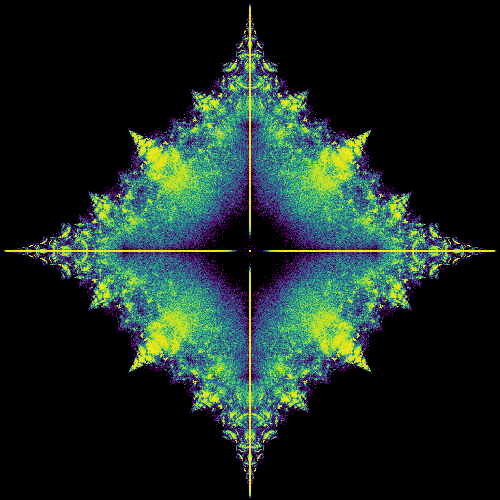

Took 67.95733714103699 seconds to compute and plot 


In [20]:
Nsample = 5*10**4 # 36 seconds for 50,000 eigenvalues
mdim = 31
pcode = [1,3]
population = [populationlist[p] for p in pcode]
A = SkewSymmetricTridiagonal(mdim)
sequencelength = A.getNumberOfMatrixEntries()
numberpossible = len(population)**sequencelength
print( sequencelength, numberpossible )
# Make this reproducible, for testing purposes: choose a seed
random.seed( 21713 )

start = time.time()
bounds = [-2, 2, -2, 2]
nrow = 500
ncol = 500
image = DensityPlot(bounds, nrow, ncol)
for k in range(Nsample):
    A.makeMatrix([ population[random.randrange(len(population))] for j in range(sequencelength)])
    image.addPoints(A.eig())

poplabel = "_".join([str(i) for i in pcode])
cmap = 'viridis'
image.makeDensityPlot(cmap, filename='../Supplementary Material/Bohemian/skewsymtri/pop_{}_{}_{}N{}.png'.format(pcode,cmap,mdim,Nsample), bgcolor=[0, 0, 0, 1], colorscale="cumulative")
finish = time.time()
print("Took {} seconds to compute and plot ".format(finish-start))


### G. Upper Hessenberg matrices
Upper Hessenberg matrices occur in the numerical computation of eigenvalues: everything below the first subdiagonal is zero. More, if any entry on the first subdiagonal is zero, the eigenvalue problem reduces to two smaller ones; from our point of view we may insist on non-zero subdiagonal entries only. Here is a five-by-five example:

\begin{equation*}
\left[\begin{array}{ccccc}
h_{0,0} & h_{0,1} & h_{0,2} & h_{0,3} & h_{0,4} 
\\
 h_{1,0} & h_{1,1} & h_{1,2} & h_{1,3} & h_{1,4} 
\\
 0 & h_{2,1} & h_{2,2} & h_{2,3} & h_{2,4} 
\\
 0 & 0 & h_{3,2} & h_{3,3} & h_{3,4} 
\\
 0 & 0 & 0 & h_{4,3} & h_{4,4} 
\end{array}\right]
\end{equation*}

There are $n + n-1 + n-2 + \cdots + 1 = n(n+1)/2$ possible places in the upper triangle, including the diagonal; there are $n-1$ places on the subdiagonal. If the population $P$ has \#$P = p$ entries and $0 \in P$, then there are  
\begin{equation*}
    H(n) = p^{{n(n+1)}/{2}}(p-1)^{n-1}
\end{equation*}
such matrices.   If $0 \notin \mathbb{P}$, then there are
\begin{equation*}
    \hat{H}(n) = p^{{n(n+1)}/{2} + n-1} = p^{n(n+3)/2 - 1}
\end{equation*}
such matrices.  This family has only just begun to be investigated; see [this arXiv paper](https://arxiv.org/abs/1809.10653) which was later subsumed in {cite:p}`chan2020upper`.  The first example below is _unit_ upper Hessenberg; each entry in the subdiagonal is $1$.  The example after that is _both_ upper Hessenberg and Toeplitz: this combination makes the family more tractable.

#### An upgrade of Gerschgorin's Theorem for unit upper Hessenberg matrices.
Suppose that $H$ is unit upper Hessenberg, by which we mean that all the subdiagonal entries are $1$. For instance, take the 5 by 5 case below:

\begin{equation*}
H = \left[\begin{array}{ccccc}
h_{0,0} & h_{0,1} & h_{0,2} & h_{0,3} & h_{0,4} 
\\
 1 & h_{1,1} & h_{1,2} & h_{1,3} & h_{1,4} 
\\
 0 & 1 & h_{2,2} & h_{2,3} & h_{2,4} 
\\
 0 & 0 & 1 & h_{3,3} & h_{3,4} 
\\
 0 & 0 & 0 & 1 & h_{4,4} 
\end{array}\right] .
\end{equation*}

The Gerschgorin circle theorem, unadorned, says that the eigenvalues are in the union of the disks centred at $h_{0,0}$, $h_{1,1}$, $h_{2,2}$, $h_{3,3}$, and $h_{4,4}$, and the radii of those disks are bounded by the sums of the absolute values of the other row entries: $|h_{0,1}| + |h_{0,2}| + |h_{0,3}| + |h_{0,4}|$ for the first row, and so on.  But each entry is at most the size of the largest entry in $P$&mdash;call that number $\| P \|$ the _height_ of the family.  So the radius of the first circle is at most $(m-1)\|P\|$ (if the matrix is dimension $m$; in the above example $m$ is $5$). The second is at most $1 + (m-2)\|P\|$, and so on; the last one is at most $1$.  This is good, and tells us a region in the complex plane where all the eigenvalues can be.

But we can do better, for this family of matrices.  Multiply by $\mathbf{S} =$ diag$(1,r,r^2, \ldots, r^{m-1})$ on one side, say the left, and by $\mathbf{S}^{-1}$ on the other. This is a [similarity transformation](https://en.wikipedia.org/wiki/Matrix_similarity) and does not change the eigenvalues, as you would learn in a standard linear algebra course.  The result is (for our five by five example)

$$
\left[\begin{array}{ccccc}
h_{0,0} & \frac{h_{0,1}}{r} & \frac{h_{0,2}}{r^{2}} & \frac{h_{0,3}}{r^{3}} & \frac{h_{0,4}}{r^{4}} 
\\
 r  & h_{1,1} & \frac{h_{1,2}}{r} & \frac{h_{1,3}}{r^{2}} & \frac{h_{1,4}}{r^{3}} 
\\
 0 & r  & h_{2,2} & \frac{h_{2,3}}{r} & \frac{h_{2,4}}{r^{2}} 
\\
 0 & 0 & r  & h_{3,3} & \frac{h_{3,4}}{r} 
\\
 0 & 0 & 0 & r  & h_{4,4} 
\end{array}\right]
$$

Now the radius from the first row is bounded by $(1/r + 1/r^2 \cdots 1/r^{m-1})\|P\|$ which is less than the _infinite_ geometric sum $1/(r(1-1/r)) = 1/(r-1)$ times $\|P\|$, so long as $r > 1$ so the series converges.
Similarly, the radius of the next row (and all subsequent rows) is less than $r + \|P\|/(r-1) = 1 + r-1 + \| P\|/(r-1) $. This is always bigger than the radius from the first row.  This will be minimized over all choices of $r$ if the two final terms in that equation (which when multiplied together are constant) are actually equal: $(r-1)^2 = \|P\|$, or $r = 1 + \sqrt{\|P\|}$.  This gives a radius of at most $1 + 2\sqrt{\|P\|}$.  Thus we take circles centred at each $p \in P$ of radius $1+2\sqrt{\|P\|}$ and we are guaranteed that all eigenvalues of every member of the unit upper Hessenberg family lies within that set.

This turbocharges Gerschgorin a little bit: the plain Gerschgorin circle theorem gives a bound that depends on the dimension; this version gives a bound that depends only on the _square root_ of the height of the population, and guarantees that the dimension won't make a big difference.

In [21]:
mdim = 6  # mdim=6 takes about two minutes
pcode = [2,8]
population = [populationlist[k] for k in pcode]
A = UnitUpperHessenberg(mdim)
sequencelength = A.getNumberOfMatrixEntries()
numberpossible = len(population)**sequencelength
possibilities = itertools.product(population, repeat=sequencelength)
possible = iter(possibilities)
print( sequencelength, numberpossible )
eigenvalues = []
start = time.time()
for p in possible:
    A.makeMatrix(p)
    ev = A.eig()  
    for e in ev:
        eigenvalues.append(e)
finish = time.time()
print("Took {} seconds to compute the eigenvalues ".format(finish-start))

21 2097152
Took 188.5577700138092 seconds to compute the eigenvalues 


In [22]:
bounds = [-2,4,-3,3]
nrow = 1800
ncol = 1800
start = time.time()
image = DensityPlot(bounds, nrow, ncol)
image.addPoints( eigenvalues )
finish = time.time()
print("Took {} seconds to add eigenvalues to the image ".format(finish-start))

Took 40.63211107254028 seconds to add eigenvalues to the image 


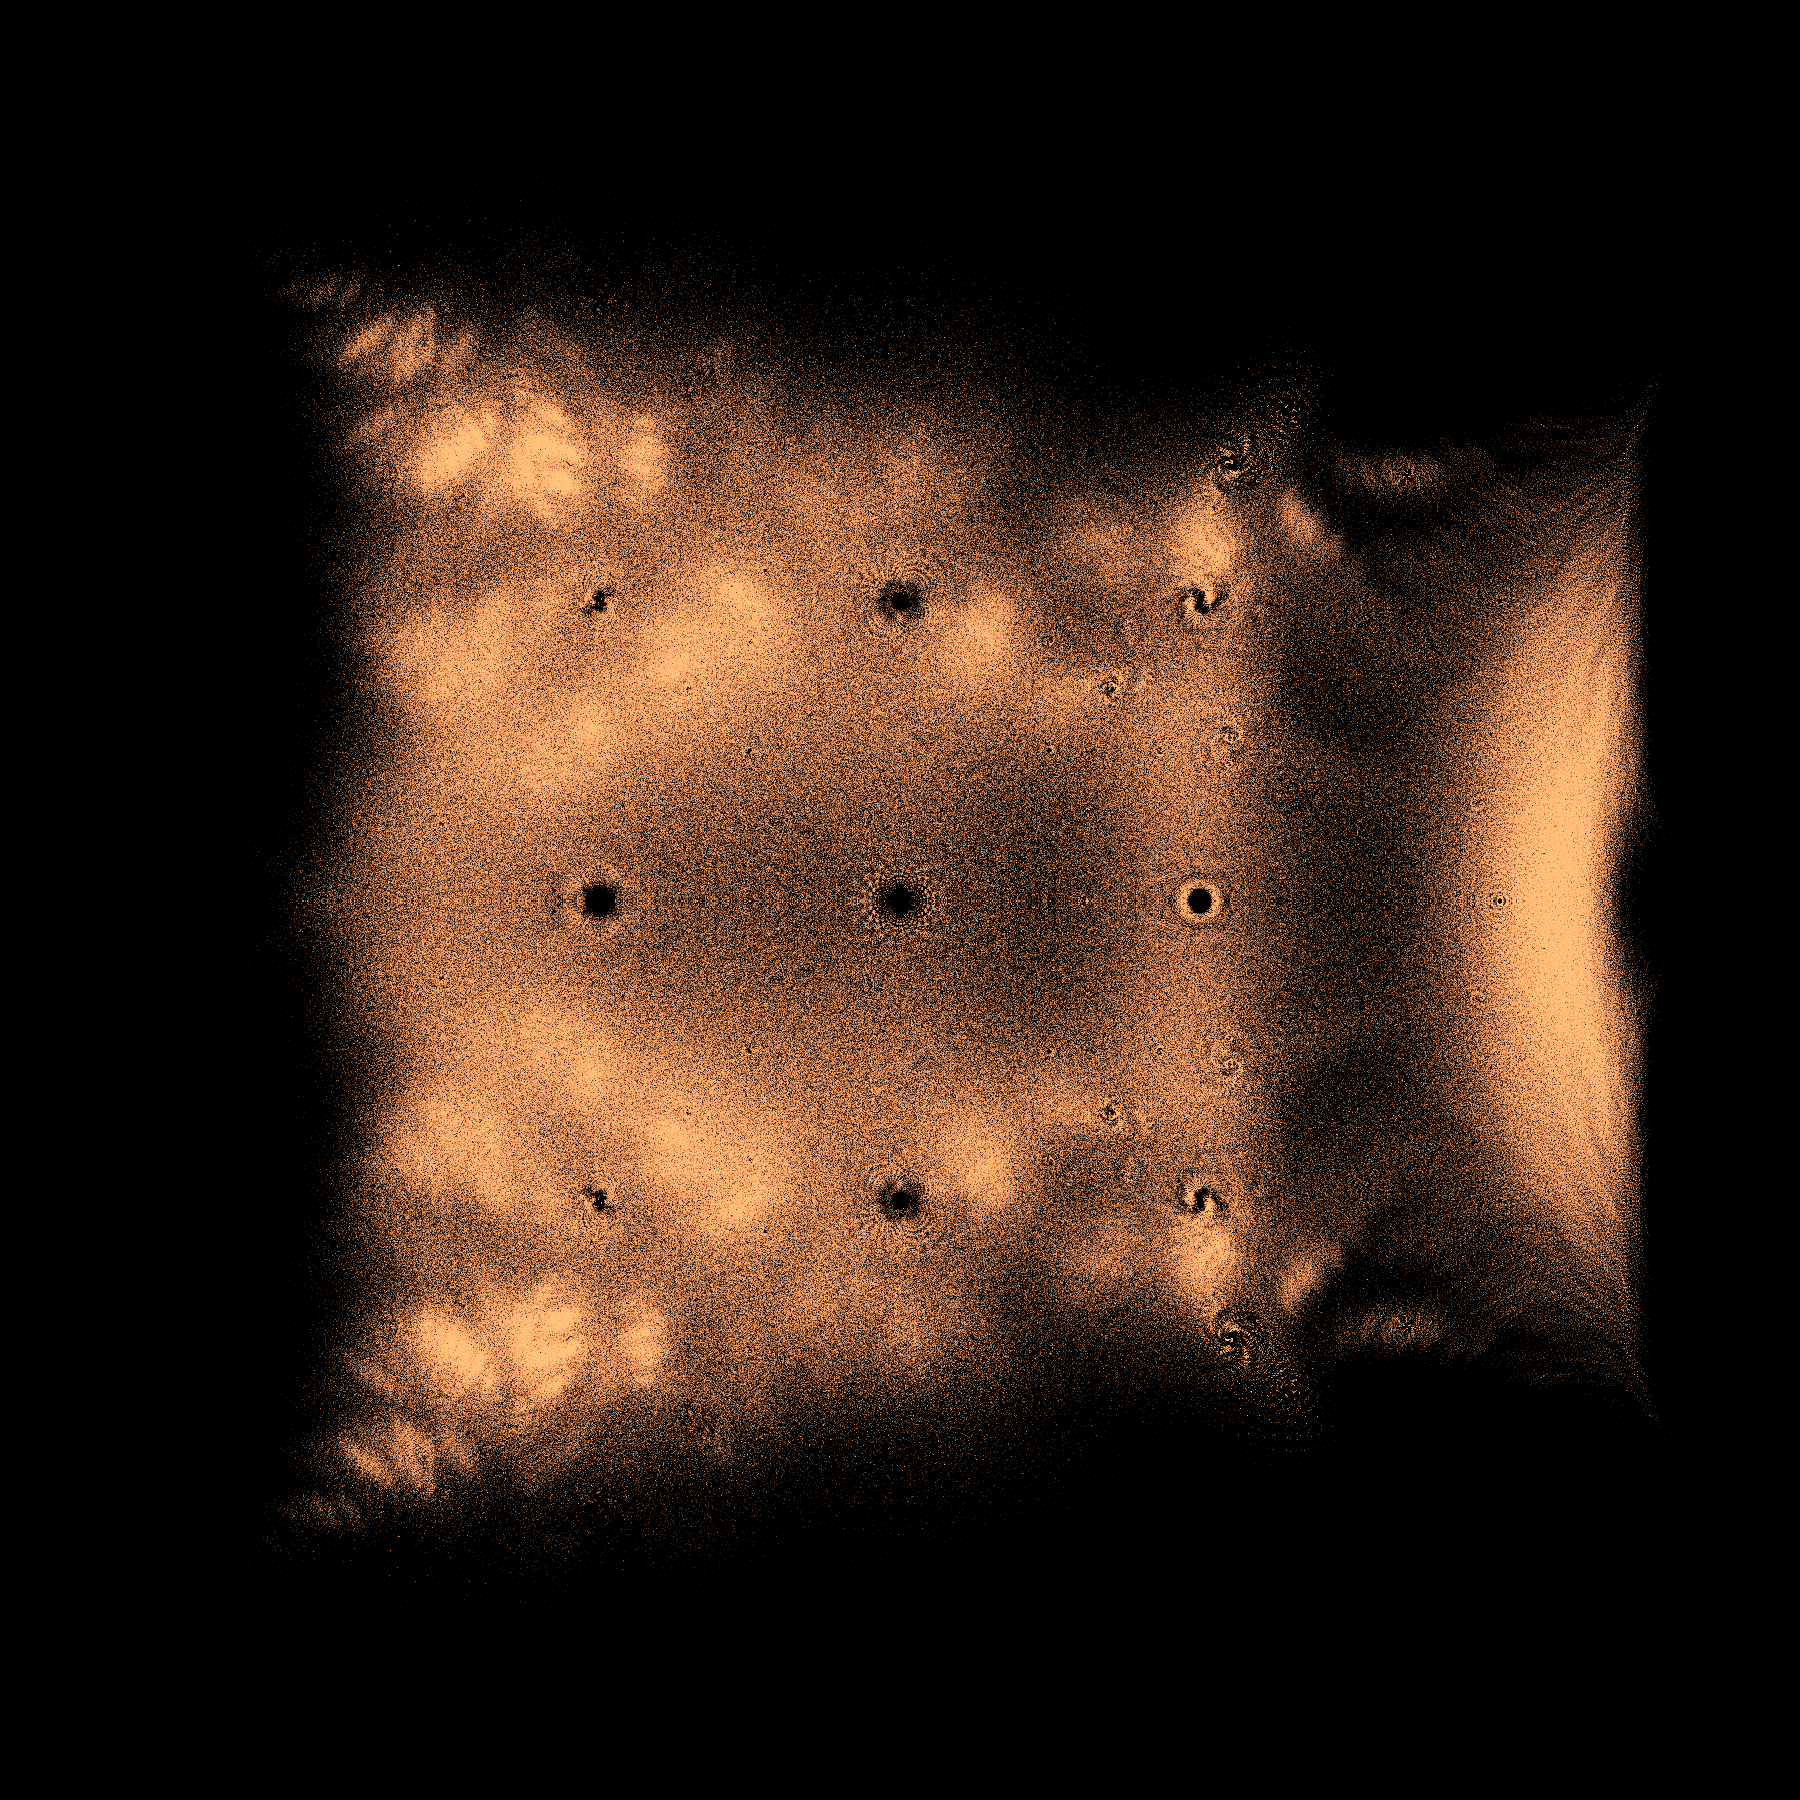

Took 5.127157688140869 seconds to colourize the image.


In [23]:
start = time.time()
poplabel = "_".join([str(i) for i in pcode])
cmap = 'copper'
image.makeDensityPlot(cmap, filename='../Supplementary Material/Bohemian/UnitUpperHessenberg/Exhaustivepop{}_{}by{}_{}_{}N{}.png'.format(poplabel,nrow,ncol,cmap,mdim,numberpossible), bgcolor=[0, 0, 0, 1], colorscale="cumulative")
finish = time.time()
print("Took {} seconds to colourize the image.".format(finish-start))

11 177147


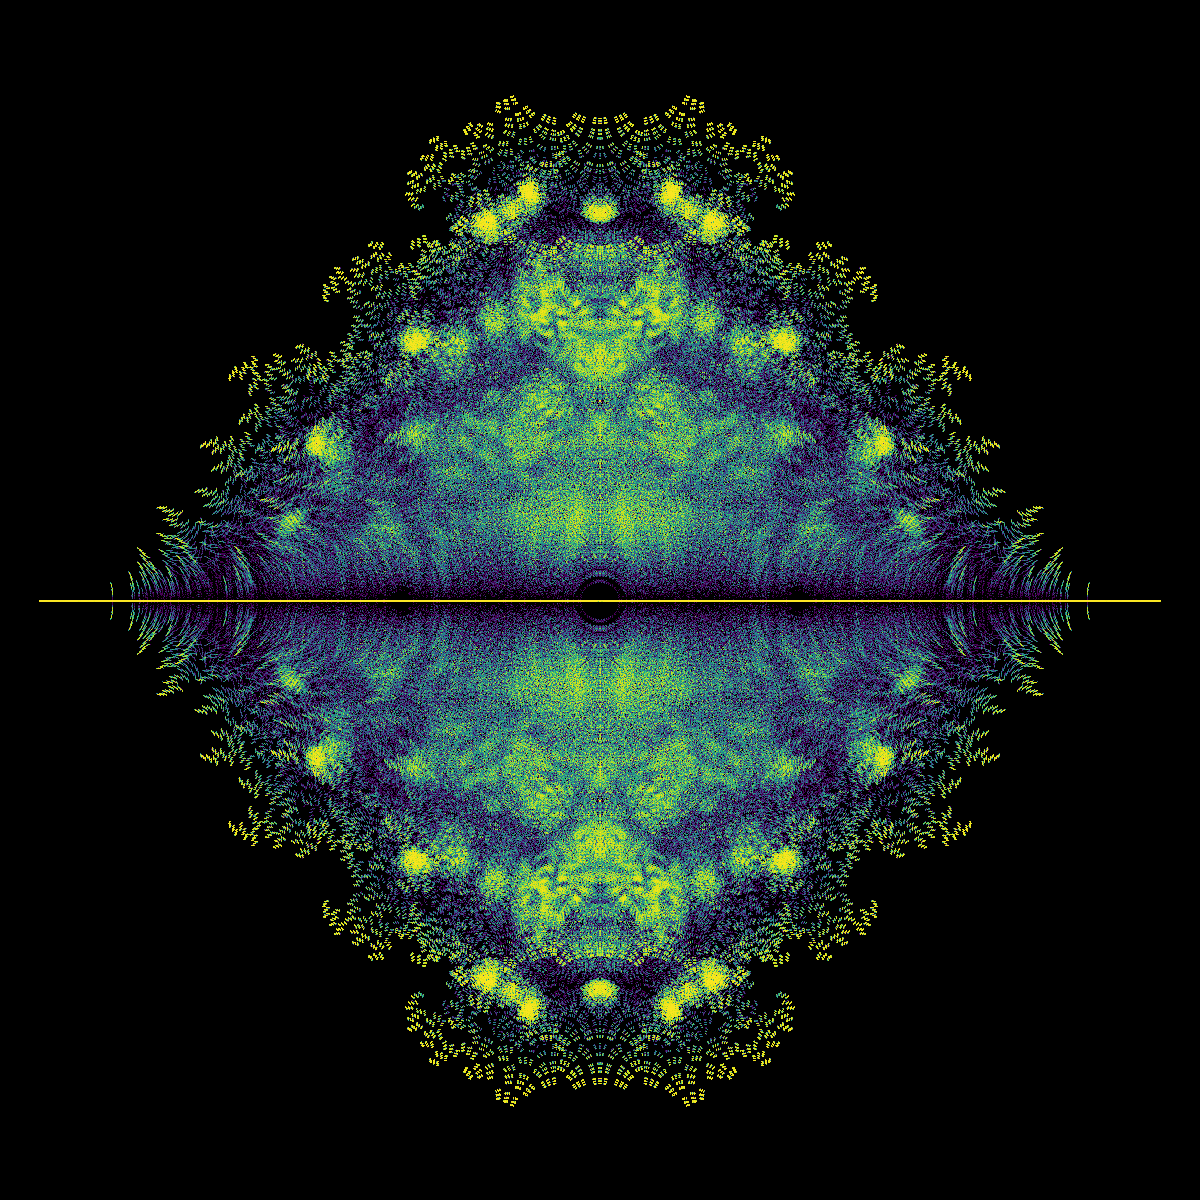

Took 46.300509452819824 seconds to compute and plot 


In [24]:
mdim = 12 # Exhaustive is ok with dimension 12: only 177,147 matrices
pcode = [5,0,1]
population = [populationlist[k] for k in pcode] 
A = UHTZD(mdim)
sequencelength = A.getNumberOfMatrixEntries()
numberpossible = len(population)**sequencelength
possibilities = itertools.product(population, repeat=sequencelength)
possible = iter(possibilities)
print( sequencelength, numberpossible )
eigenvalues = []
start = time.time()
for p in possible:
    A.makeMatrix(p)
    ev = A.eig()
    for e in ev:
        eigenvalues.append(e)

bounds = [-3,3,-3,3]
nrow = 1200
ncol = 1200
image = DensityPlot(bounds, nrow, ncol)
image.addPoints( eigenvalues )
poplabel = "_".join([str(i) for i in pcode])
cmap = 'viridis'
image.makeDensityPlot(cmap, filename='../Supplementary Material/Bohemian/UHTZD/Exhaustivepop_{}_{}_{}N{}.png'.format(poplabel,cmap,mdim,numberpossible), bgcolor=[0, 0, 0, 1], colorscale="cumulative")
finish = time.time()
print("Took {} seconds to compute and plot ".format(finish-start))


### H. Frobenius companion matrices
Given a polynomial, say,
\begin{equation*}
    q(x) = q_{0} + q_{1}x + q_{2}x^{2} + q_{3}x^{3} + x^{4}
\end{equation*}
we can write down several matrices; for example
\begin{equation*}
    \mathbf{Q} = 
    \begin{bmatrix}
        0 & 0 & 0 & -q_{0} \\
        1 & 0 & 0 & -q_{1} \\
        & 1 & 0 & -q_{2} \\
        & & 1 & -q_{3}
    \end{bmatrix}
\end{equation*}
whose eigenvalues are the roots of the original polynomial. Such matrices are called "Frobenius companion" matrices. This is how Matlab actually solves polynomials, by the way.

These are very well studied, but there's still more to learn. See {cite:p}`borwein2001visible`, {cite:p}`borwein1997polynomials`, [John Baez's website](http://math.ucr.edu/home/baez/), and [Dan Christensen's website](http://jdc.math.uwo.ca/).

### I. Generalized companion matrices
Generalized companion matrices are also sometimes known as "colleague" matrices or "comrade" matrices.

Polynomials do not have to be expressed as linear combinations of the functions $1$, $x$, $x^{2}$, $\ldots$, $x^{n}$. This set forms a basis for polynomials of degree at most $n$, it is true, but there are thousands of other named bases (actually an uncountable number, but only a finite number of names to go round!). The restriction to a Bohemian family does different things in different bases. For instance, consider a Lagrange basis on the distinct nodes $[-1, -\frac{1}{2}, \frac{1}{2}, 1]$; that is, the roots of the node polynomial
\begin{equation*}
    w(z) = (z + 1)(z + \frac{1}{2})(z - \frac{1}{2})(z - 1) \>.
\end{equation*}
Computing the partial fraction decomposition of
\begin{equation*}
    \frac{1}{w(z)} = \frac{\beta_{-1}}{z + 1} + \frac{\beta_{-\frac{1}{2}}}{z + \frac{1}{2}} + \frac{\beta_{\frac{1}{2}}}{z - \frac{1}{2}} + \frac{\beta_{1}}{z - 1}
\end{equation*}
we find the numerical values of the "barycentric weights" $\beta_k$: $-2/3$, $4/3$, $-4/3$, and $2/3$.
Then if a polynomial $q(z)$ takes the value $q_{-1}$, $q_{-\frac{1}{2}}$, $q_{\frac{1}{2}}$, and $q_{1}$ (from a population $\mathbb{P}$), the roots of $q(z)$ are the generalized eigenvalues of the pair $(\mathbf{B}, \mathbf{A})$
\begin{equation*}
    \begin{bmatrix}
        0 & & & & \\
        & 1 & & & \\
        & & 1 & & \\
        & & & 1 & \\
        & & & & 1
    \end{bmatrix} \quad , \quad
    \begin{bmatrix}
        0 & \beta_{-1} & \beta_{-\frac{1}{2}} & \beta_{\frac{1}{2}} & \beta_{1} \\
        q_{-1} & -1 & & & \\
        q_{-\frac{1}{2}} & & -\frac{1}{2} & & \\
        q_{\frac{1}{2}} & & & \frac{1}{2} & \\
        q_{1} & & & & 1
    \end{bmatrix}
\end{equation*}
Matlab's `eig` routine (and Maple's) will accept pairs of matrices: to find $z$ with $\mathrm{det}(z\mathbf{B} - \mathbf{A}) = 0$, equivalently $\mathrm{det}(\mathbf{A} - z\mathbf{B}) = 0$, call $\mathrm{eig}(\mathbf{A}, \mathbf{B})$ (the order of the call is important $z\mathbf{B} - \mathbf{A}$ is different to $z\mathbf{A} - \mathbf{B}$).  In Python, you have to use [scipy.linalg.eig](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html) to solve the generalized eigenvalue problem.

Lagrange basis companion eigenvalue problems were the first Bohemian eigenvalue problems solved, in 2004, although the name wasn't invented then.

Note that the population $\mathbb{P}$ is augmented by the nodes and the barycentric weights $\beta$ in a special way.

### J. Anti-tridiagonal matrices and anti-banded matrices
One of our students made these categories up (we have never seen them used in practice)  Anti-tridiagonal matrices and anti-banded matrices such as
\begin{equation*}
    \begin{bmatrix}
        & & & & 1 & 2 \\
        & & & 1 & 2 & 3 \\
        & & 1 & 2 & 3 & \\
        & 1 & 2 & 3 & & \\
        1 & 2 & 3 & & & \\
        2 & 3 & & & &
    \end{bmatrix}
\end{equation*}
produce interesting pictures.  

### K. Generalized Bohemian eigenvalues
Eigenvalues of $z\mathbf{B} - \mathbf{A}$ where $\mathbf{A}$ and $\mathbf{B}$ are Bohemian, of any families. Almost nothing is known here.

### L. Polynomial eigenvalues in Bohemia
$\mathrm{det}\mathbf{Q}(z) = 0$ where 
\begin{equation*}
    \mathbf{Q}(z) = \mathbf{Q}_{0} + z\mathbf{Q}_{1} + z^{2}\mathbf{Q}_{2} + \cdots + z^{r}\mathbf{Q}_{rm}
\end{equation*}
and each $\mathbf{Q}_{i}$ is an $r \times r$ Bohemian. Basically, nothing is known here and we have very few pictures.

### M. Higher dimensions
If we have two polynomial equations in two unknowns, for example
\begin{align*}
    x^{2} + y^{2} - 1 &= 0 \\
    25xy - 12 &= 0
\end{align*}
then we can find a pair of matrices $\mathbf{M}_{x}$ and $\mathbf{M}_{y}$ such that the matrices commute $\mathbf{M}_{x}\mathbf{M}_{y} = \mathbf{M}_{y}\mathbf{M}_{x}$ and share eigenvectors; $\mathbf{M}_{x}\overrightarrow{u} = x\overrightarrow{u}$ and $\mathbf{M}_{y}\overrightarrow{u} = y \overrightarrow{u}$; these eigenvalues $(x, y)$ will solve the system. This is the multidimensional analogue of companion matrices.

__Twelfth Activity:__ Find all pairs of commuting Bohemian matrices from a given population, and graphically display the correct pairs of eigenvalues. This is hard.

### N. Doubly companion matrices

The "doubly" companion matrix was invented by John C. Butcher and co-workers in order to study certain methods for solving differential equations numerically.  So far as we know, they have no other use.  But they do make interesting Bohemian pictures and there are many unanswered questions about those pictures.  Here is a five by five example _doubly companion matrix_ :

$$
\left[\begin{array}{ccccc}
-\alpha_{1} & -\alpha_{2} & -\alpha_{3} & -\alpha_{4} & -\alpha_{5}-\beta_{5} 
\\
 1 & 0 & 0 & 0 & -\beta_{4} 
\\
 0 & 1 & 0 & 0 & -\beta_{3} 
\\
 0 & 0 & 1 & 0 & -\beta_{2} 
\\
 0 & 0 & 0 & 1 & -\beta_{1} 
\end{array}\right]
$$
The dimension $m$ doubly companion matrix takes $2m$ parameters; if these are chosen from a population $P$, then there are $p^{2m}$ possible such matrices. If all of the $\alpha_j$ are zero, or if all of the $\beta_j$ are zero, this is just a Frobenius companion matrix. 

**Thirteenth Activity**: find an interesting population for doubly companion matrices and produce some nice density plots.  See if you can discover something previously unknown.

### O. Other
1. Checkerboard (one of our students made this structure up!)
2.["persymmetric" are symmetric about the anti-diagonal](https://en.wikipedia.org/wiki/Persymmetric_matrix).
There are also ["centrosymmetric" matrices](https://en.wikipedia.org/wiki/Centrosymmetric_matrix) and as of this time of writing, no-one has drawn any Bohemian pictures of those.
3. Cauchy matrices (see Chapter 22 of the Handbook of Linear Algebra)
4. Loewner matrices (likewise)
5. Jacobi matrices  (likewise)
6. Recursive (like the Mandelbrot matrices)
7. Invent your own!

## Choice of colours, and colourizing the density plots
We took a long time to figure out a reasonable way to colourize the density plots.  We clearly wanted (and still want) "hotter" colours to represent higher density, and so that means some kind of monotonically-increasing colour function or map. We use 'viridis' and 'plasma' because they are [perceptually even](https://matplotlib.org/stable/tutorials/colors/colormaps.html). There are some great videos at that link (or pointed to by that link) which talk about creating a perceptually even colour scheme; and similarly about robustness under various kinds of colour blindness.  In the end, we settled on a scheme that tried to weight the colours also with the _area_ covered at a particular density.  That is, we counted all the pixels with a count of (say) 5 eigenvalues in each pixel and we used that information to help map into the colour scheme.  Specifically, this is for the option we call "cumulative", because it uses a cumulative frequency count to ensure monotonicity, and also to _attempt_ to even out the _areas_ of the figure that have any given range of colour.  Some of the results are quite pleasing (to our eyes) but you may very well wish to experiment with other colour functions.

There are a _lot_ of possible professional visualization techniques that you could use, as well (for example, something called "splatting with a triangular kernel").  Go for your life!  We're going to stick with the simplest things, and fiddle with the resolutions to get the effects we want.  We get some quite nice pictures this way.

We call this one "van Gogh Mountains", because it reminds us (a bit, anyway) of [The Starry Night](https://en.wikipedia.org/wiki/The_Starry_Night).

```{figure} ../Figures/Bohemian\ Matrices/vanGoghMountains.png
---
height: 300px
name: vanGoghMountains
---
van Gogh Mountains
```

In [25]:
# We now read in a saved set of characteristic polynomials, so we can work with it. 
mdim=5 
A = Symmetric(mdim)
pcode = [5,3,7] # This is -1, i, and -i
poplabel = "_".join([str(i) for i in pcode])
population = [populationlist[p] for p in pcode]
sequencelength = A.getNumberOfMatrixEntries()
numberpossible = len(population)**sequencelength
fname = '../Supplementary Material/Bohemian/symmetric/exhaustivecharpolys_pop_{}_m{}_N{}.json'.format(poplabel,mdim,numberpossible)
print( fname )
in_file = open(fname,"r")
saved_charpolys = json.load(in_file)
in_file.close()
charpoly_tuple_dict = {ast.literal_eval(k): v for k, v in saved_charpolys.items()}

# Compute the roots, this time without worrying about copies
kis = charpoly_tuple_dict.keys()
N = mdim*len(kis)
print( "Number of polynomials (not counting copies) is {} so the number of roots is {}".format(len(kis),N) )
print( "The number of matrices is {} so the number of eigenvalues is {}".format(numberpossible,mdim*numberpossible))
rtvec = []
residuals = []
singulars = []
nilpotents = []
start = time.time()
for ptuple in kis:
    pol = Poly([c for c in ptuple])
    if ptuple[0]==0:
        singulars.append(pol)
    trail = list(ptuple[:5])
    if not any(trail):
        nilpotents.append(ptuple)
    rts = pol.roots()
    for j in range(mdim):
        rtvec.append( rts[j] )
        residuals.append( pol(rts[j]) ) # Compute the polynomial at all the putative roots
finish = time.time()
print("Took ", finish-start, " seconds to find all {} of the roots".format(len(rtvec)))
print( "There are ", len(singulars), "characteristic polynomials with zero as a root")
print( "There are ", len(nilpotents), "Characteristic polynomials with quadruple zero roots", nilpotents)


../Supplementary Material/Bohemian/symmetric/exhaustivecharpolys_pop_5_3_7_m5_N14348907.json
Number of polynomials (not counting copies) is 75415 so the number of roots is 377075
The number of matrices is 14348907 so the number of eigenvalues is 71744535
Took  13.977798700332642  seconds to find all 377075 of the roots
There are  7575 characteristic polynomials with zero as a root
There are  0 Characteristic polynomials with quadruple zero roots []


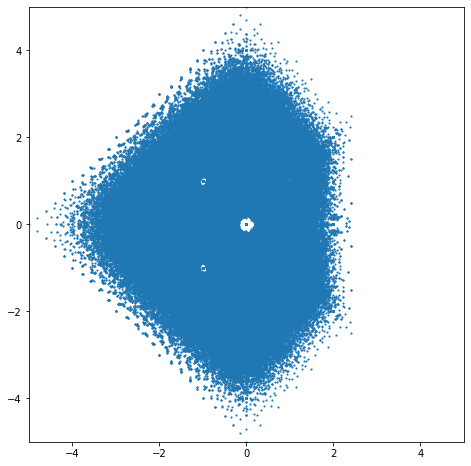

In [26]:
x = [e.real for e in rtvec]
y = [e.imag for e in rtvec]
eigplot = plt.figure( figsize=(8,8) )
plt.scatter( x, y, s=5, marker=".")
plt.xlim(-mdim,mdim)
plt.ylim(-mdim,mdim)
plt.gca().set_aspect('equal')
plt.show()

Took  9.378981590270996  seconds to recompute and make a density plot of the roots (including copies)


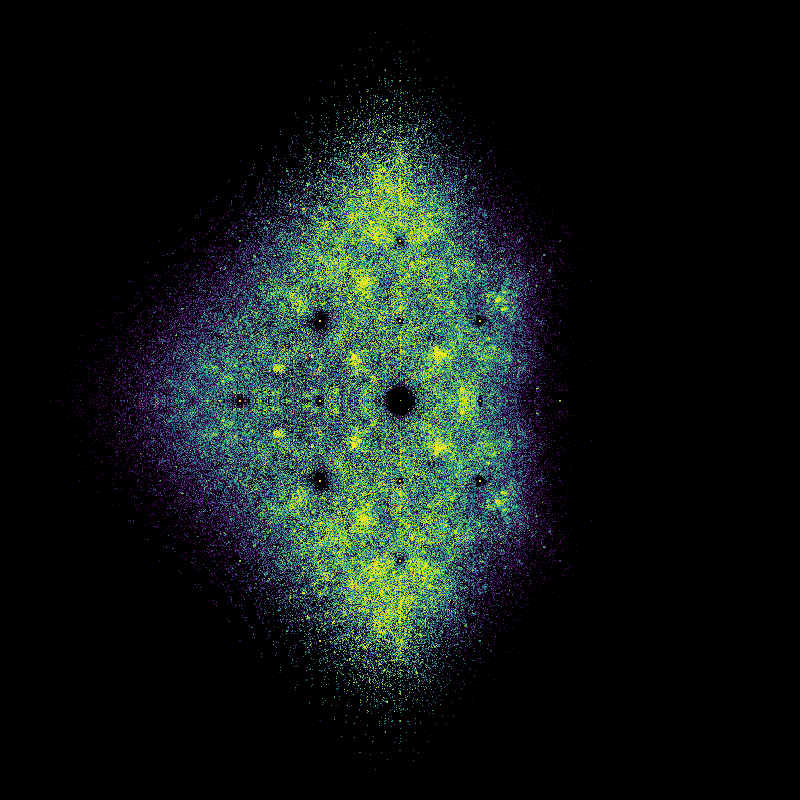

In [27]:
nrow = 800
ncol = 800
bounds = [-5,5,-5,5] #[-mdim,mdim,-mdim,mdim]
image = DensityPlot(bounds, nrow, ncol)
start = time.time()
for ptuple in kis:
    pol = Poly([c for c in ptuple])
    rts = pol.roots()
    image.addMultiplePoints(rts, charpoly_tuple_dict[ptuple])
finish = time.time()
print("Took ", finish-start, " seconds to recompute and make a density plot of the roots (including copies)" )
cmap = 'viridis'
image.makeDensityPlot(cmap, filename='../Supplementary Material/Bohemian/symmetric/p_{}_{}whole_{}N{}.png'.format(poplabel,cmap,mdim,numberpossible), 
                      bgcolor=[0,0,0, 1], colorscale="cumulative")


In [28]:
mx = 0
for r in residuals:
    mx = max( mx, abs(r) )  # If the roots were exactly right, these would all be zero

# A small maximum residual is acceptable; it is essentially a measure
# of the effect of rounding error.  Numerical analysts point out this is not
# the whole story!  One also needs the theory of "condition numbers." We save that 
# for another day.
print("Maximum residual is ", mx)

Maximum residual is  4.600963249166934e-12


 How many _stable_ matrices are there? There are two kinds of "stable" matrices: one with all eigenvalues in the left-half plane $\Re(\lambda) < 0$ and another with all eigenvalues inside the unit disk, $|\lambda| < 1$.  The first is important for differential equations like $\dot y(t) = \mathbf{A} y(t)$ and the second is important for difference equations (recurrence equations) such as $y_{k+1} = \mathbf{A} y_k$.  It is an interesting exercise to select out stable matrices.  It turns out that for symmetric matrices with population $-1\pm i$, _all_ of the matrices have eigenvalues in $\Re(\lambda)\le 0$ so they are all at least "neutrally" stable.  To prove this, we had to learn a theorem new to us, the Bendixon--Bromwich--Hirsch theorem, from the early 1900s (the first paper was published in 1902).  We won't give the details here.  In contrast to the symmetric case with population $-1\pm i$ (which we plot below and you can see have $\Re(\lambda)\le 0$), for the _big_ file just loaded in and plotted above (for population $(\pm i, 1)$), many of the polynomials have roots in the right half plane. 

28 268435456


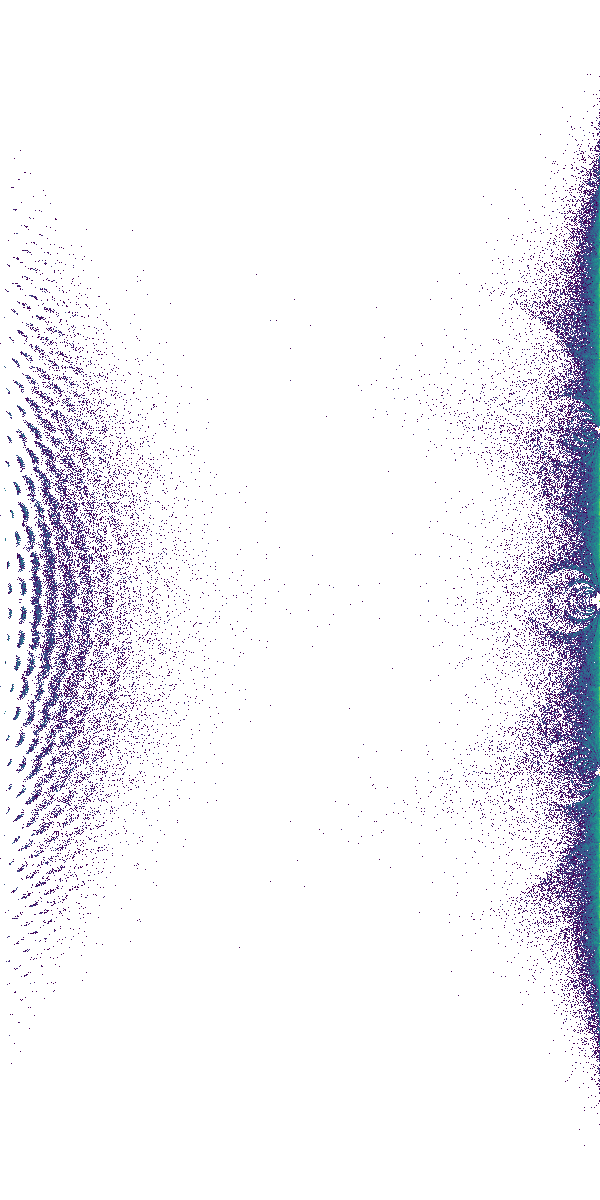

Took 9.466660499572754 seconds to compute and plot 


In [29]:
Nsample = 5*10**4 #10**4  # Took 4 and a bit hours for (m=7 and nsample = 15*10**7)
# 5 hours and ten minutes m=8 nsample=1.5e8 (integer form)
mdim = 7 # has 268 million matrices
#mdim = 8 # has 68 billion matrices

A = Symmetric(mdim)
pcode = [4,6]
population = [populationlist[p] for p in pcode]
sequencelength = A.getNumberOfMatrixEntries()
numberpossible = len(population)**sequencelength
print( sequencelength, numberpossible )
# Make this reproducible, for testing purposes: choose a seed
random.seed( 21713 )

start = time.time()
bounds = [-mdim, 0, -mdim, mdim]
nrow = 1200
ncol = 600
image = DensityPlot(bounds, nrow, ncol)
for k in range(Nsample):
    A.makeMatrix([ population[random.randrange(len(population))] for j in range(sequencelength)])
    image.addPoints(A.eig())

poplabel = "_".join([str(i) for i in pcode])
cmap = 'viridis'
image.makeDensityPlot(cmap, filename='../Supplementary Material/Bohemian/symmetric/p_{}_{}whole_{}N{}.png'.format(poplabel,cmap,mdim,Nsample), bgcolor=[1, 1, 1, 1], colorscale="log")
finish = time.time()
print("Took {} seconds to compute and plot ".format(finish-start))

## Discussion topics

Here are some questions for discussion (most of which we can't answer, or have only partial answers for).

First, there are the "exclusion zones," the "holes" in the pictures where there are no eigenvalues. Some of the holes look starlike.  Can you explain these?  There is the very interesting paper by Edmund Harriss, Katherine Stange, and Steve Trettel called [Algebraic Number Starscapes](https://arxiv.org/abs/2008.07655), which has a kind of number-theoretic explanation.  Rather deep material, though!  More papers are being written on this, using Galois theory too.

Peter Borwein and Chris Pinner had already explained a similar gap for "Littlewood polynomials", that is polynomials with coefficients from $\mathbb{P} = \mathbb{L} := \{-1, 1\}$. They also have explained the larger gap between $0$ and the nearest non-real root. The topic/question for discussion here is more "what does it mean to explain this?" In some sense these pictures just _are_. In another sense there's an idea of "fairness" or "balance" at work. The eigenvalues must lie in the union of three disks each of radius 4 centered at $-1$, $0$, and $1$ by the __[Gershgorin circle theorem](https://en.wikipedia.org/wiki/Gershgorin_circle_theorem)__; and since there's a finite number of eigenvalues, there must be holes and gaps between any two eigenvalues that are not exactly equal. 
If a Bohemian eigenvalue is going to be "close" to zero, then like a "snap-to" guide on a computer the eigenvalue will actually _be_ zero.

Why is there a visible pattern to the holes? Part of the explanation lies in the symmetry of the Gershgorin disks: each hole will have two "parts" or "reflections" either to the left of the right. Then there is the puzzling shape of the exclusion zone around all the eigenvalues. For case A, it's the outside of a slightly flattened oval (restricting the matrices further to those with trace zero &mdash;that is the sum of the diagonal elements&mdash;might "unflatten" the oval: why don't you try? Let us know what the picture looks like). This is not _too_ surprising.

But for upper Hessenberg Toeplitz, with zero diagonal, we get a decided lozenge. Why the angular shape? Does it persist as the dimension $n \to \infty$? We have now solved this one!  We used properties of large-dimension Toeplitz matrices (and the turbocharged Gerschgorin theorem) for this.  

For the skew-symmetric case, we used the Bendixon&mdash;Bromwich&mdash;Hirsch Theorem mentioned above to explain the "square" and "diamond" shapes.  We just now solved both these puzzles (this week and last week, as this is being written). The paper describing these two solutions is still being written (by the time this gets through its own review and publication process, we _might_ be able to give a reference.


But most of the other puzzles remain.

It's all a bit frustrating. (Welcome to the world of mathematical research. The puzzles here can be arbitrarily difficult.) 

We do _not_ have any explanation (yet) for the diffraction patterns.  The best we can do is that the apparent curves are really what the human eye sees when curves _stop_; we're looking at the edges of other curves.  This is part of the "Algebraic Number Starscapes" theory, we think.  We don't really understand that theory.  

But there are other things to discover, too.  Your job just now is discovery; explanation can wait.

### The influence of population
If we replaced $\mathbb{P} = \{-1, 0, 1\}$ with $\{-2, 0, 2\}$ all that would happen is that $\mathbf{A}$ would be replaced by $2\mathbf{A}$. It is obvious after the fact that if $\mathbf{A}\overrightarrow{x} = \lambda\overrightarrow{x}$ so $\lambda$ is an eigenvalue of $\mathbf{A}$, then $2A\overrightarrow{x} = 2\lambda\overrightarrow{x}$ so $2\lambda$ is an eigenvalue of $2\mathbf{A}$. Similarly eigenvalues for the population $\{-2, -1, 0, 1, 2\}$ will be twice the eigenvalues for $\{-1, -\frac{1}{2}, 0, \frac{1}{2}, 1\}$.

Similarly, the population $\{-i, 0, i\}$ will merely give eigenvalues $i\lambda$ if $\lambda$ comes from the population $\{-1, 0, 1\}$; that is, they'll be rotated 90 degrees. Shifts (translations) are not so easy. The eigenvalues from $\{0, 1, 2\}$ are quite different to those of $\{-1, 0, 1\}$ even though each matrix in the Bohemian family for $\{0, 1, 2\}$ corresponds exactly to a matrix from the family $\{-1, 0, 1\}$ (just subtract the matrix that is all $1$s).

__Fourteenth Activity:__ Some populations that we have looked at are $\mathbb{P} = \{-1, 0, 1\}$, $\{0, 1\}$, $\{-1, 1\}$, $\{-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5\}$, $\{-1, -\frac{1}{1000}, 0, \frac{1}{1000}, 1\}$, and $\{0, \{\pm F_{k}\}_{k=1}^{m}\}$ for $F_{k}$ being Fibonacci numbers: $F_{0}$, $F_{1} = 1$, $F_{k+1} = F_{k} + F_{k-1}$; see the [beautiful eigenvalue picture originally by Venkataraman Balasubramanian](http://www.bohemianmatrices.com/gallery/Fibonacci_5x5/). Choose your own populations, make your own pictures: surprise us, and name your creations.

## Applications
These are rather fun games to play (the puzzles are too hard, though, we think). But what's it all for?

The matrices populated $\{-1, 1\}$ are called Bernoulli matrices and these are used in compressed sensing, which is a way to recover exact signals sent over lossy channel(s). The population $\{0, 1\}$ includes graph incidence matrices, which have innumerable applications (literally billions of dollars are saved every year by graph theoretic means). The matrices populated by $\{-1, 0, 1\}$ are examples of what are called "sign pattern matrices" which are used in mathematical biology. Nick Higham has used them to establish new lower bounds in open problems in computational linear algebra.

For their own reasons, Fields medallist Terence Tao and his co-worker Van Vu have studied the asymptotic distribution of eigenvalues of general matrices (case A) with populations $\{-k, -k+1, \ldots, -1, 0, 1, 2, \ldots, k\}$.

We were originally motivated simply by looking for good test problems for eigenvalue software (and polynomial rootfinding software). Indeed, we have found important bugs this way. But now the question uppermost on our minds is, what does it mean to be random, and what is the influence of nonlinearity? By sheer brute force, we may enumerate all possible eigenvalues (if the dimension is small enough) and we have a chance to understand the influence of structure (of the matrices) and of the population.

We are very excited about this project. Your contributions are very welcome.

## Exercises for the Bohemian Matrix Unit

1. Write down as many questions as you can for this unit.
2. Looking back at the Fractals Unit, there seem to be clear connections with this unit.  Discuss them.
3. Looking back at the Rootfinding Unit, there seem to be clear connections with this unit.  Discuss them.
4. Looking back at the Continued Fractions Unit, it seems a stretch to connect them.  Can you find a connection?